<center><h1> <b style='color:orange'>Predicting Mechanical Properties of Steels </b></h1></center>

## <span style="color:orange"><b>Importing Libraries</b></span>
<hr>

In [69]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
from IPython.core.display import HTML,display
import seaborn as sns
from scipy import stats
from sklearn.model_selection import StratifiedKFold,KFold,train_test_split,cross_val_score,RandomizedSearchCV,cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
import lightgbm
from lightgbm import LGBMRegressor
import optuna
import joblib

In [2]:
df=pd.read_csv('/kaggle/input/mechanical-properties-of-low-alloy-steels/MatNavi Mechanical properties of low-alloy steels.csv')
df.head()

Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
2        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
3        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
4        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta   Temperature (°C)   0.2% Proof Stress (MPa)  \
0  0.003  0.0066  0.0      0.0                 27                       342   
1  0.003  0.0066  0.0      0.0                100                       338   
2  0.003  0.0066  0.0      0.0                200                       337   
3  0.003  0.0066  0.0      0.0                300                       346   
4  0.003  0.0066  0.0      0.0                400                       316   

    Tensile Strength (MPa)   Elongation (%)   Reduction in Area (%)  
0                      490               30                      71  
1                      454               27                      72  
2                      465               23                      69  
3                      495               21                      70  
4                      489               26                      79

# <span style="color:orange"><b>EDA</b></span>
<hr>

In [3]:
# check the number of rows and columns
df.shape

(915, 20)

In [4]:
# check if any duplicate rows are present
df.duplicated().sum()

0

In [5]:
# check for NaN values
df.isna().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

In [6]:
# spliting the dataframe into features and target columns
X=df.iloc[:,:-4].copy()
y=df.iloc[:,-4:].copy()

In [7]:
# features
X.head()

Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
2        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
3        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
4        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta   Temperature (°C)  
0  0.003  0.0066  0.0      0.0                 27  
1  0.003  0.0066  0.0      0.0                100  
2  0.003  0.0066  0.0      0.0                200  
3  0.003  0.0066  0.0      0.0                300  
4  0.003  0.0066  0.0      0.0                400

In [8]:
# target columns
y.head()

0.2% Proof Stress (MPa)   Tensile Strength (MPa)   Elongation (%)  \
0                       342                      490               30   
1                       338                      454               27   
2                       337                      465               23   
3                       346                      495               21   
4                       316                      489               26   

    Reduction in Area (%)  
0                      71  
1                      72  
2                      69  
3                      70  
4                      79

In [9]:
df['Alloy code'].value_counts()

CCB    11
CCA    11
LaD    11
VbA    10
VbN    10
       ..
LAF     9
LAE     9
LAD     9
LAC     9
LAG     9
Name: Alloy code, Length: 95, dtype: int64

## <span style="color:orange"><b>Univariate analysis</b></span>
<hr>




### <span style="color:red"><b>Numerical feature columns</b></span>
<hr>


In [10]:
# clubing numerical columns together
numerical_cols=X.select_dtypes(include=np.number).columns.to_list()
numerical_cols[:4]

[' C', ' Si', ' Mn', ' P']

In [11]:
# determining the skewness values
skewness_values=df[numerical_cols].skew().to_list()
skewness_values[:3]

[0.9500646425821709, 0.7539201590656879, 0.6062873468418563]

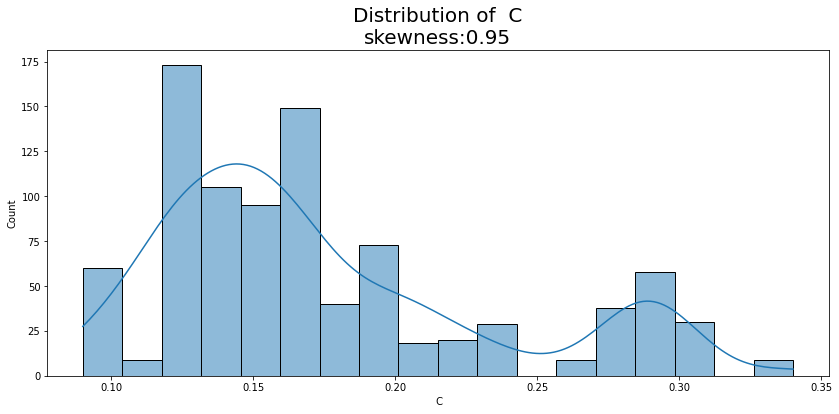

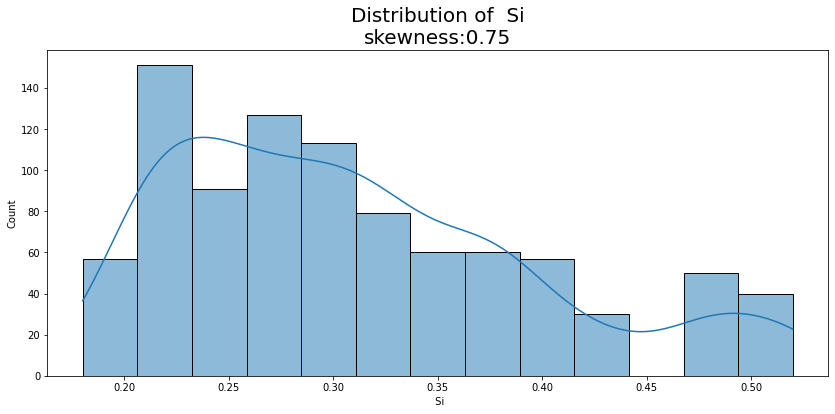

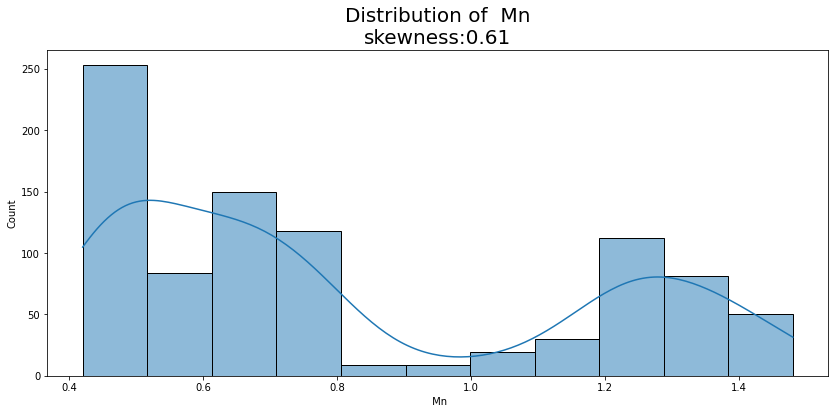

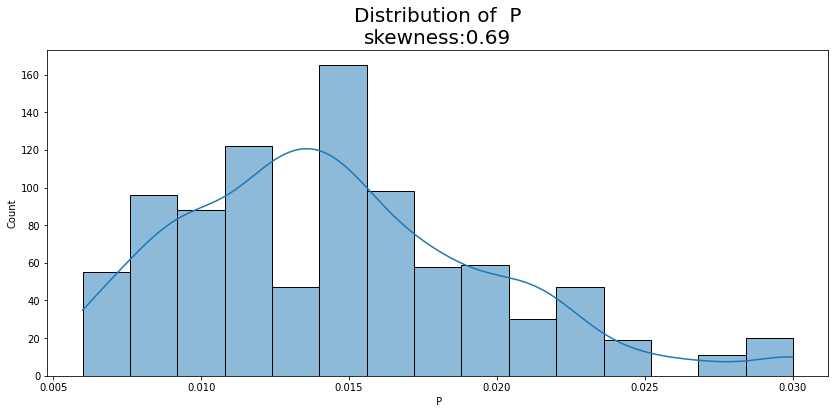

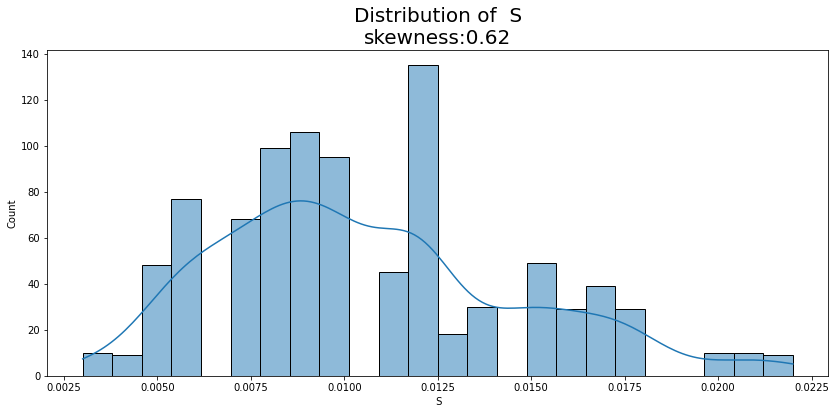

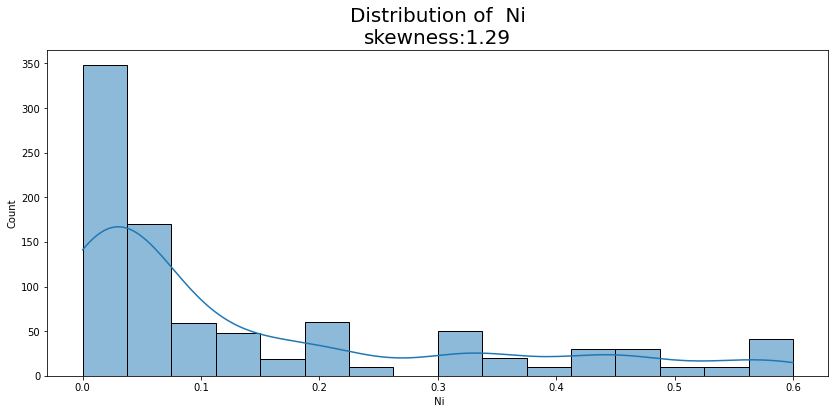

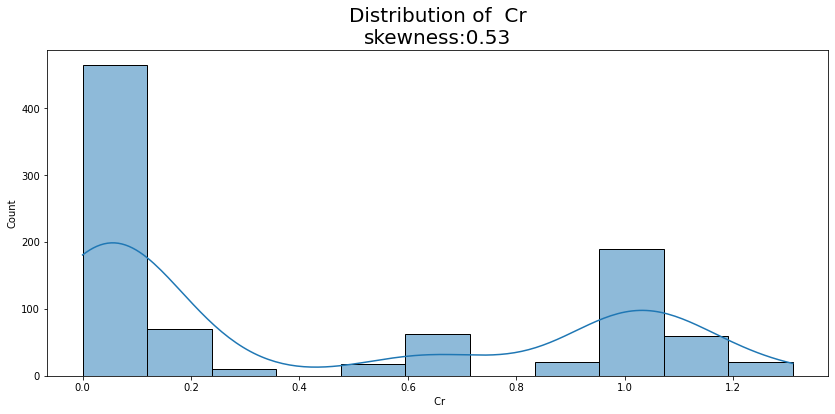

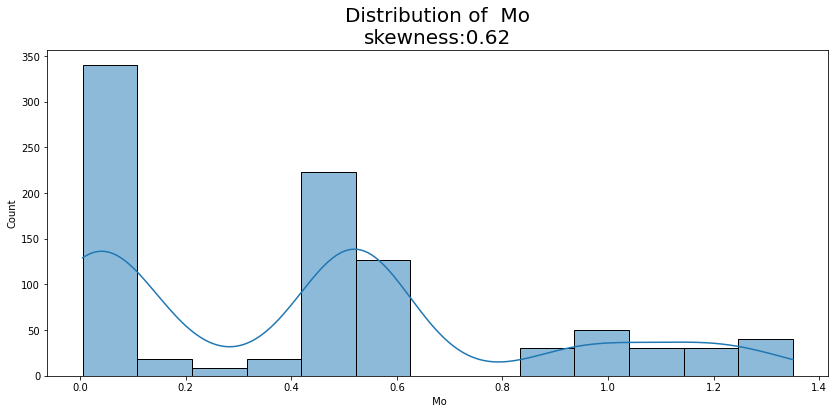

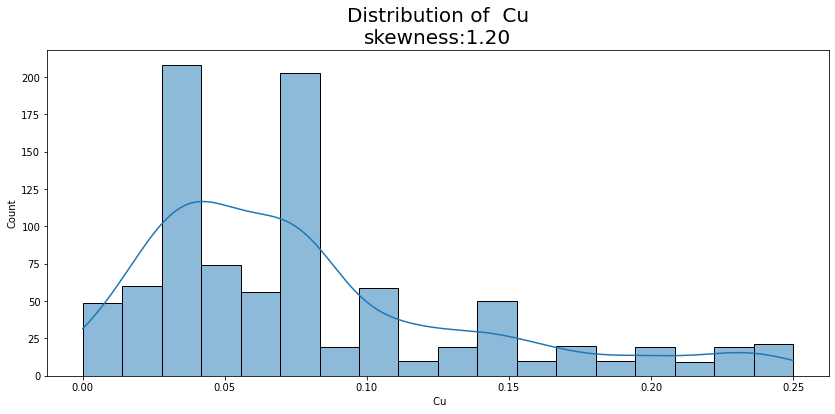

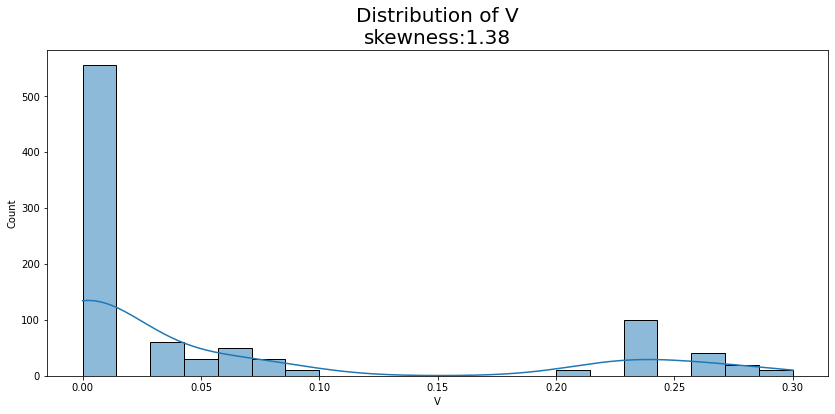

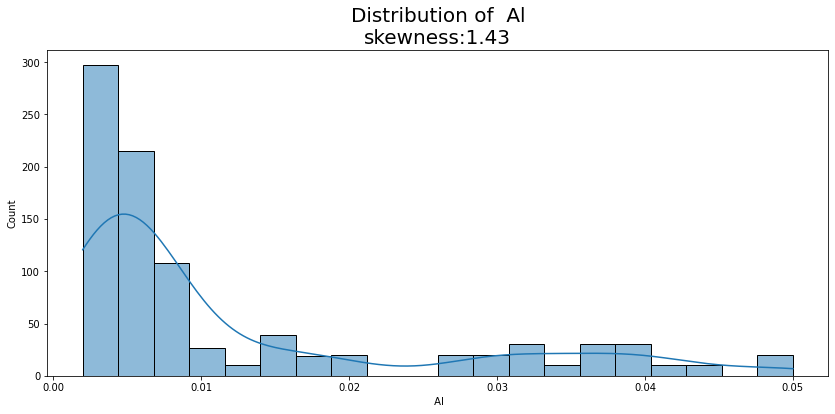

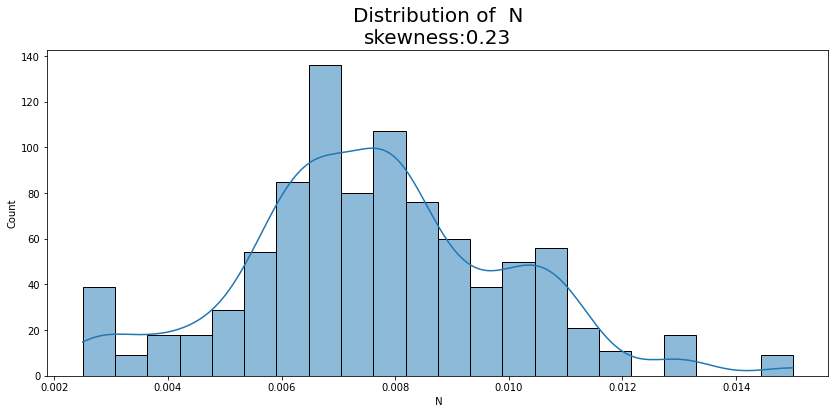

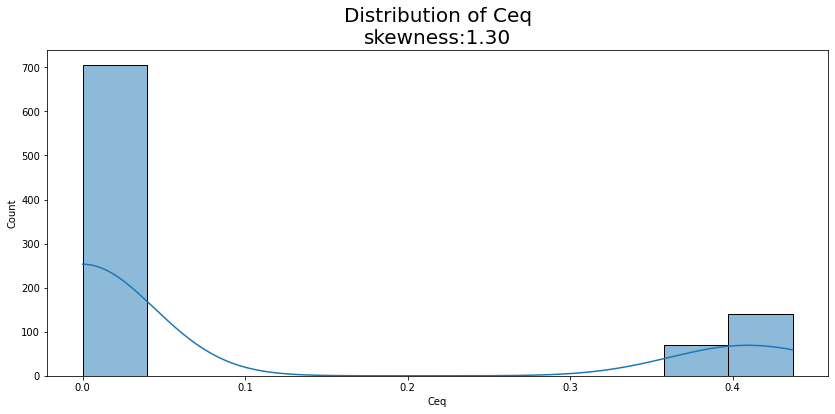

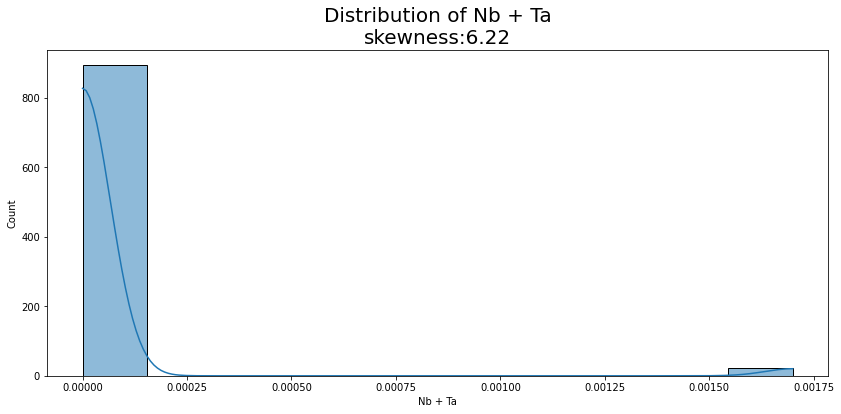

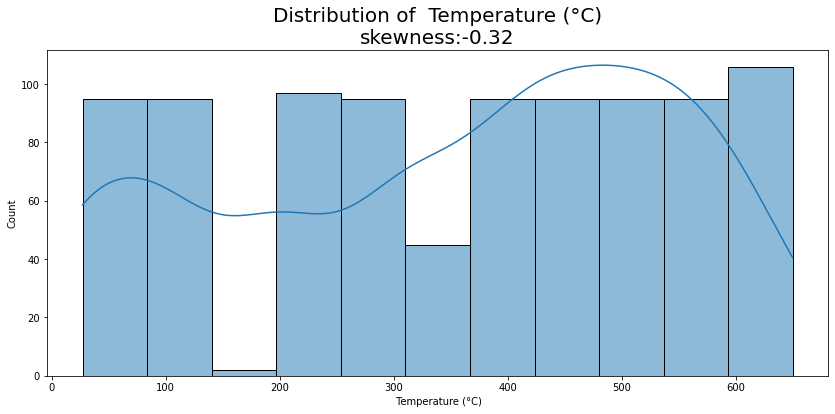

In [12]:
# distribution of numerical feature columns
for col,sk in zip(numerical_cols,skewness_values):
    plt.figure(figsize=(14,6))
    sns.histplot(data=X,x=col,kde=True)
    plt.title(f"Distribution of {col}\nskewness:{sk:.2f}",fontsize=20)

In [13]:
# counting the listing the skewed columns.
skewed_cols=[]
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        skewed_cols.append(col)


In [14]:
text="<h3>"+f"There are {len(skewed_cols)} skewed columns and they are:<br>{skewed_cols}"+"</h3>"
display(HTML(text))

<h3>Note:The feature columns whose magnitude of skewness values are greater than or equal to 0.4 will undergo <b>log-transform</b> so as to rectify their distribution.</h3>

### <span style="color:red"><b>Log Transform</b></span>
<hr>


In [15]:
# applying log-transform to the skewed columns.
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        X[col]=np.log1p(df[col])

In [16]:
# determining the skewness values after log transform
skewness_values=X[numerical_cols].skew().to_list()
skewness_values[:3]

[0.8736419568918141, 0.636150395033216, 0.4822464890622067]

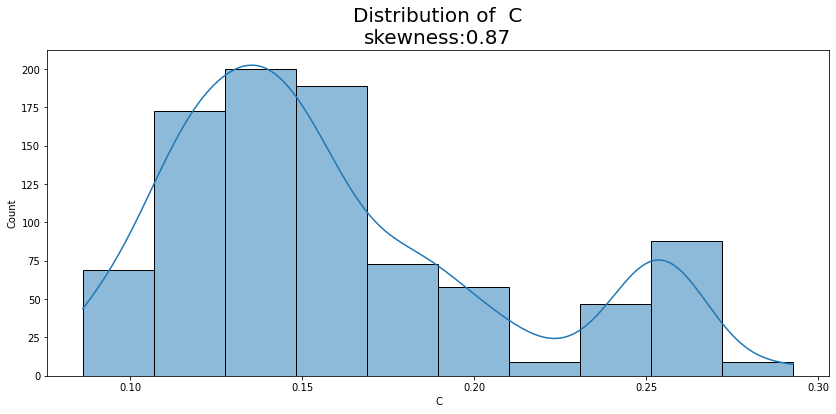

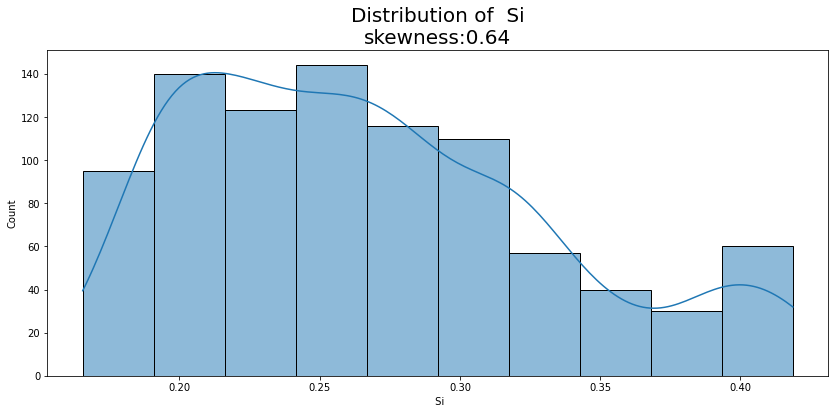

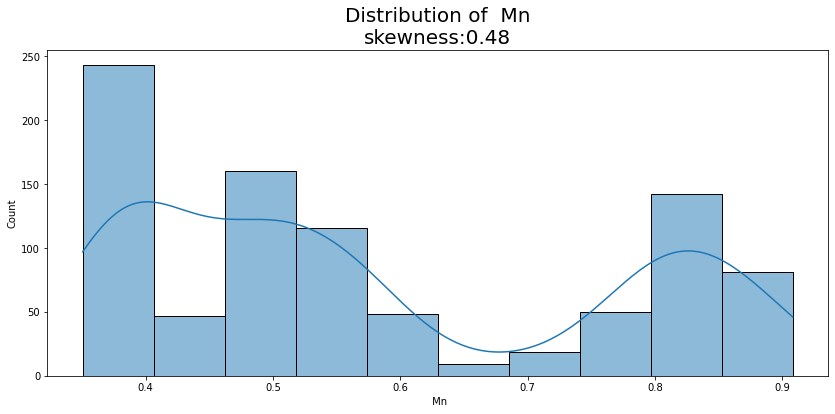

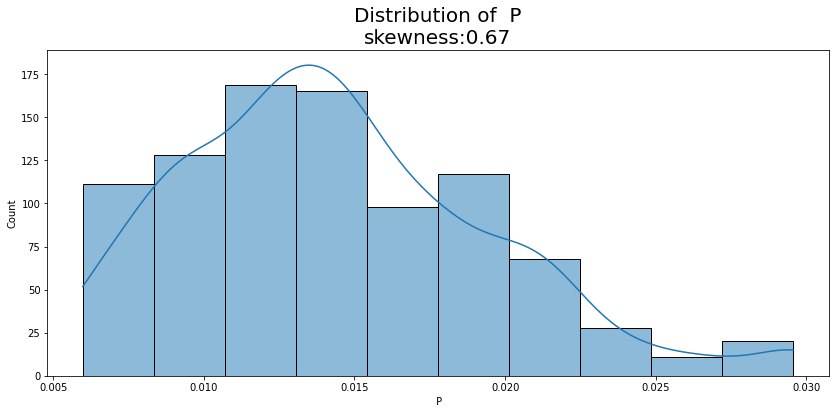

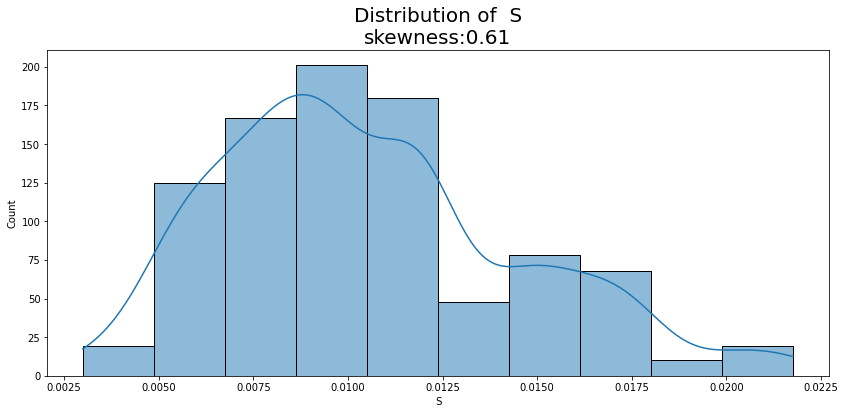

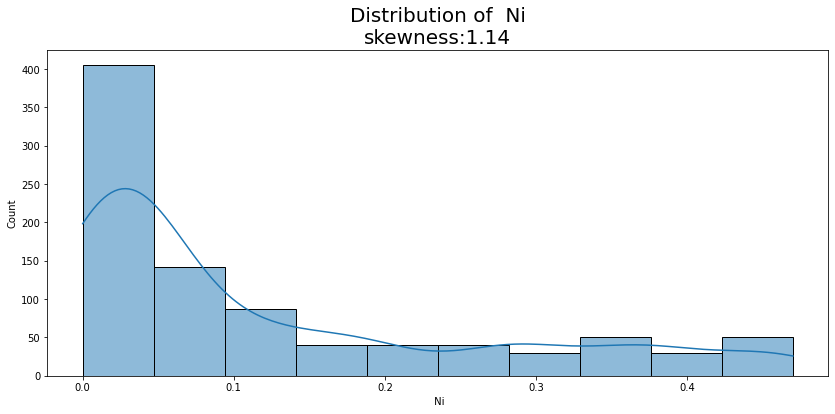

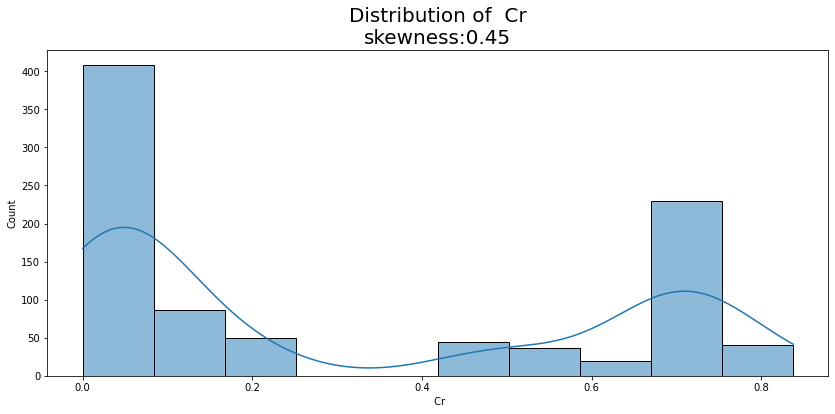

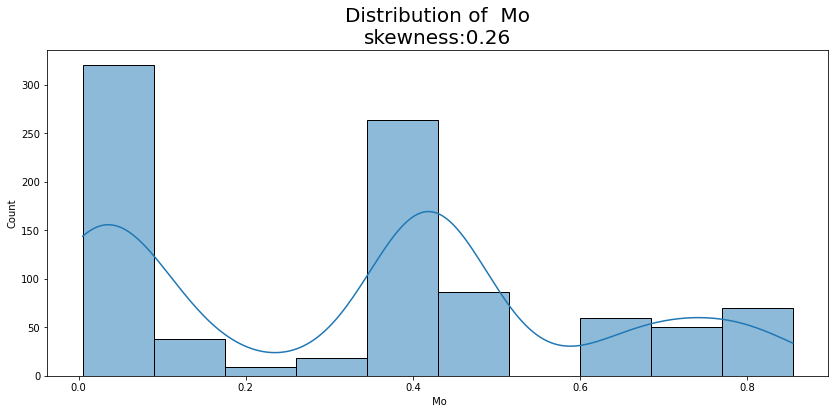

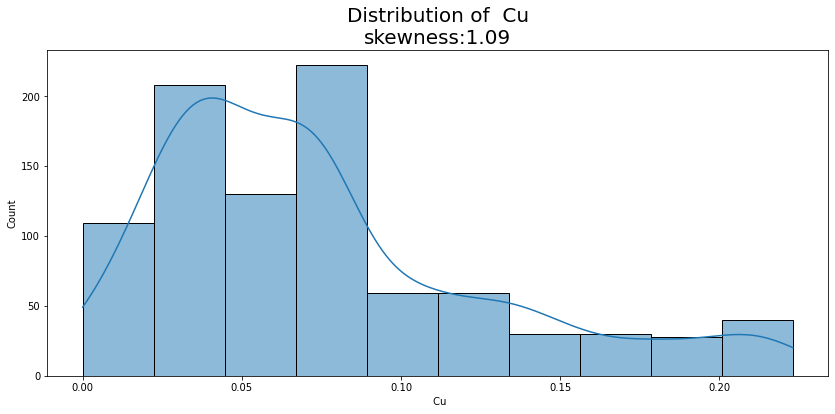

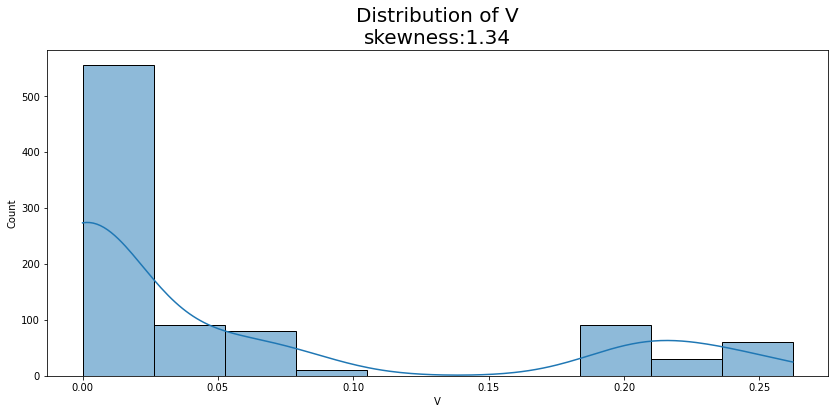

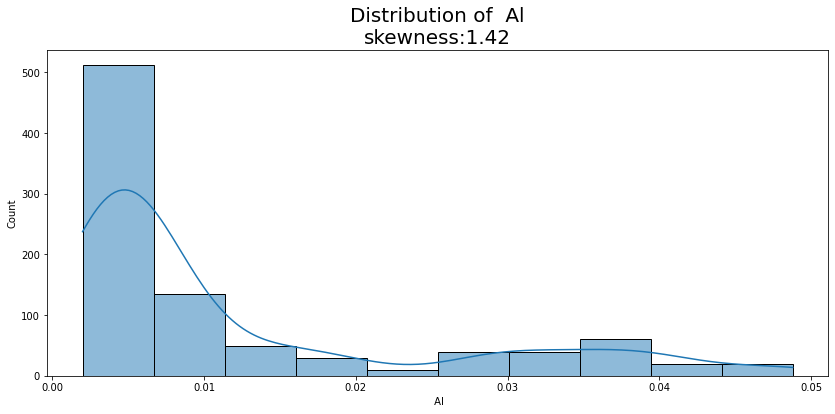

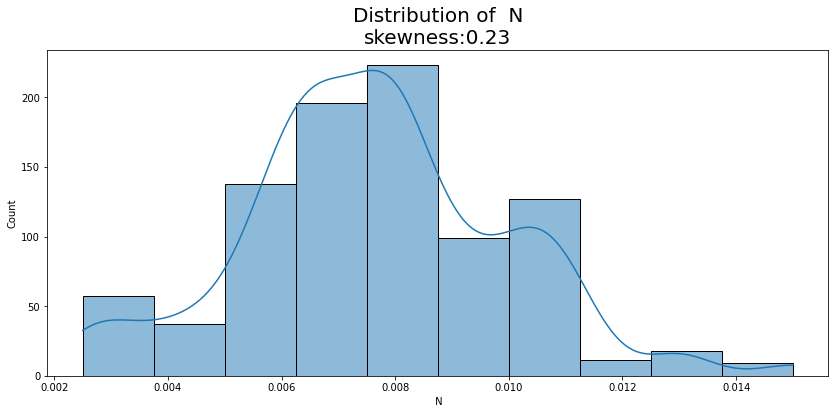

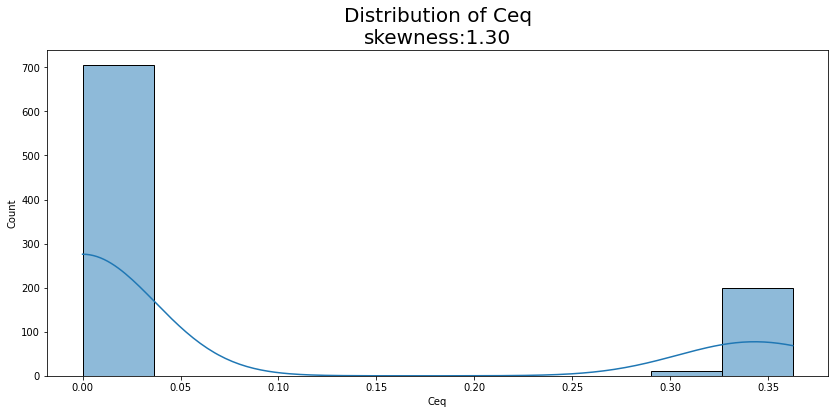

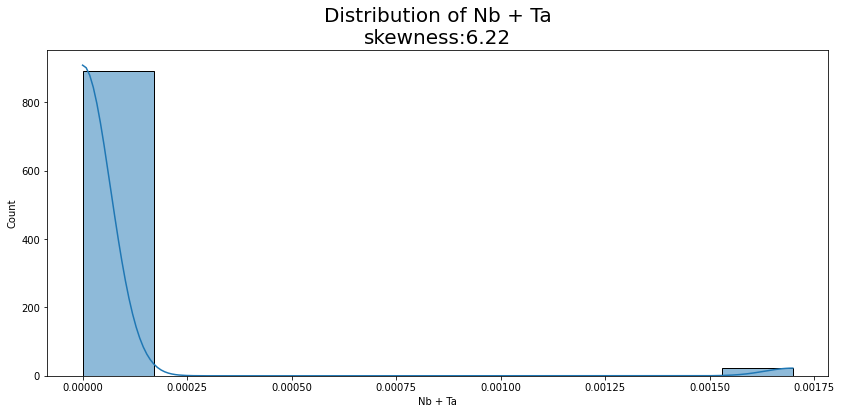

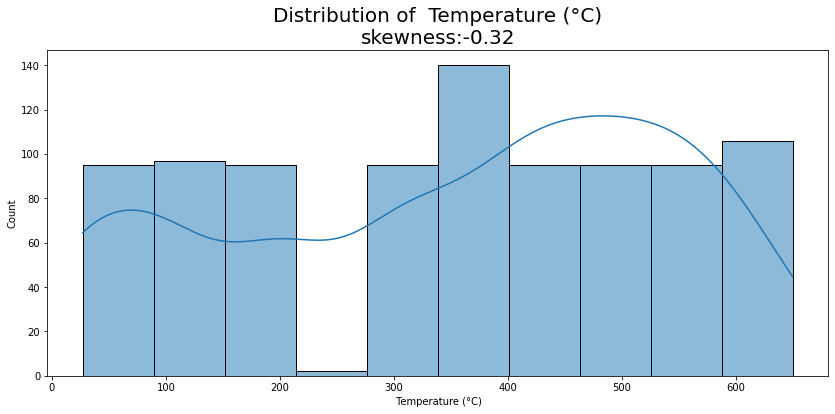

In [17]:
# Distribution of numericol feature columns after log-transform
for col,sk in zip(numerical_cols,skewness_values):
    plt.figure(figsize=(14,6))
    sns.histplot(data=X,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}\nskewness:{sk:.2f}",fontsize=20)

In [18]:
# finding the columns that are still skewed
still_skewed_cols=[]
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        still_skewed_cols.append(col)


In [19]:
text="<h3>"+f"There are {len(still_skewed_cols)} still skewed columns and they are:<br>{still_skewed_cols}"+"</h3>"
display(HTML(text))

<h3>Inference:<b>Log tranform</b> was not successful in correcting the distribution of the numerical columns,going for <b>square root transform</b>.

### <span style="color:red"><b>Square Root Transform</b></span>
<hr>



In [20]:
# determining the skewness values from the original df
skewness_values=df[numerical_cols].skew().to_list()
skewness_values[:3]

[0.9500646425821709, 0.7539201590656879, 0.6062873468418563]

In [21]:
# applying square root transform
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        X[col]=np.sqrt(df[col])

In [22]:
# determining the skewness values after square root transform
skewness_values=X[numerical_cols].skew().to_list()
skewness_values[:3]

[0.6970499296769891, 0.5167061276671908, 0.4655142123236794]

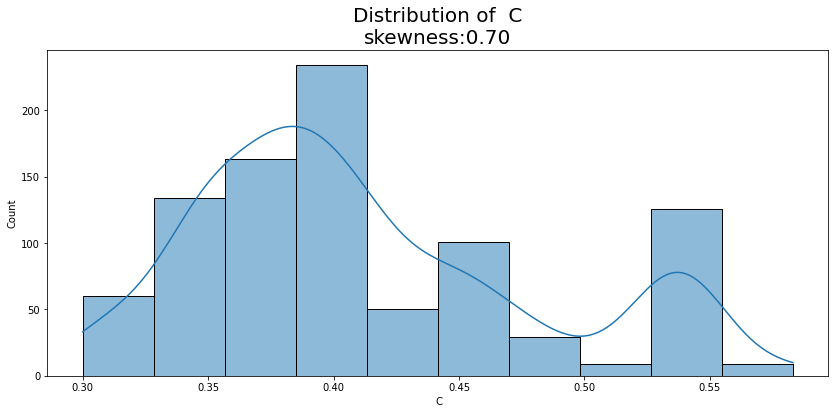

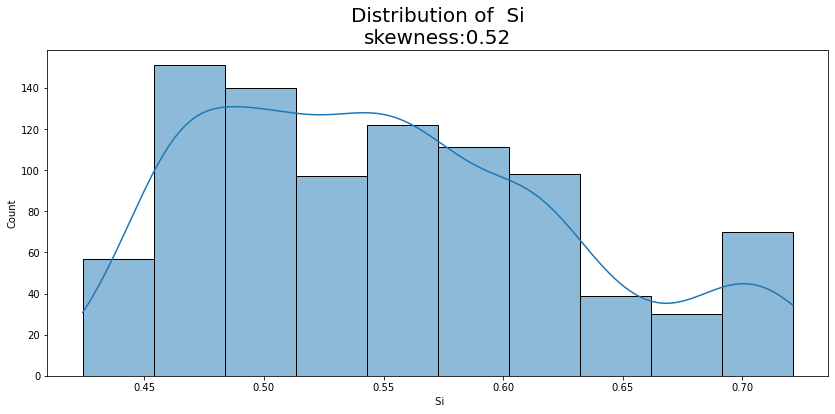

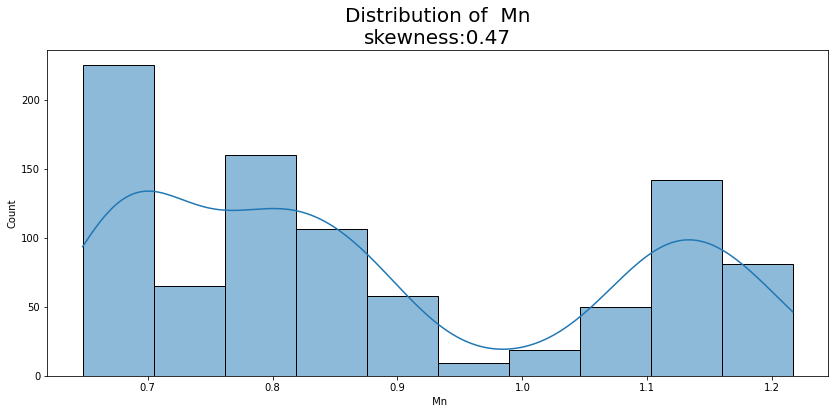

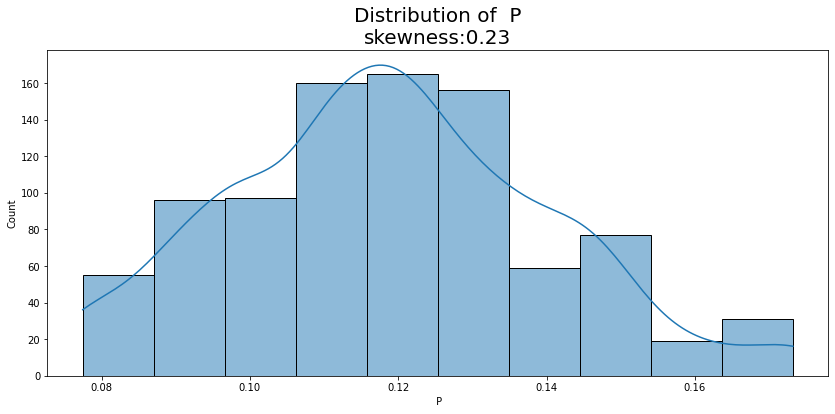

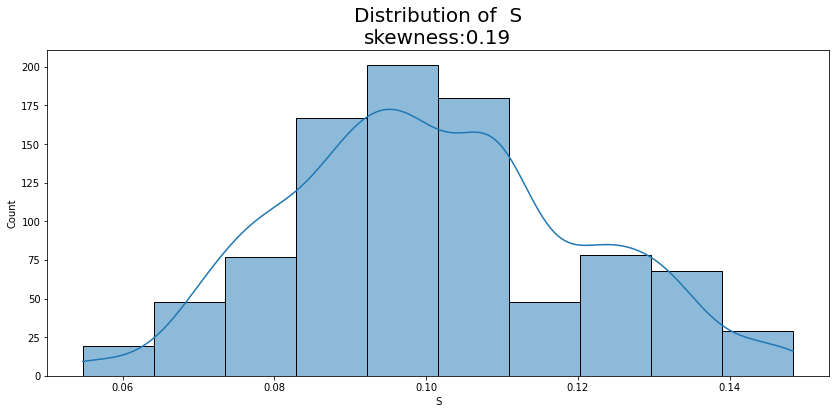

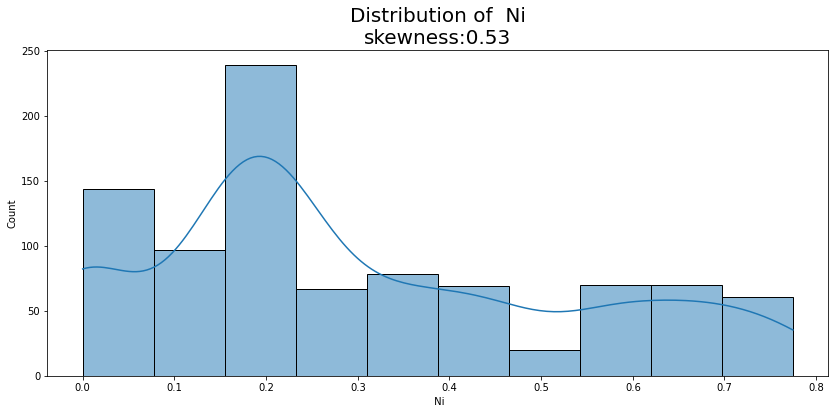

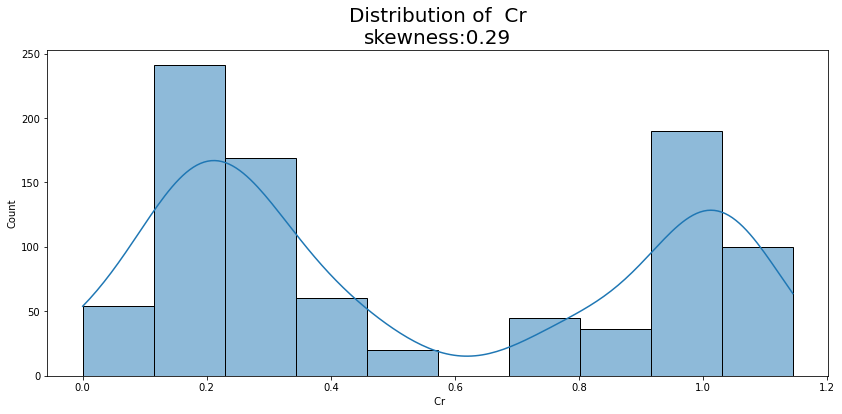

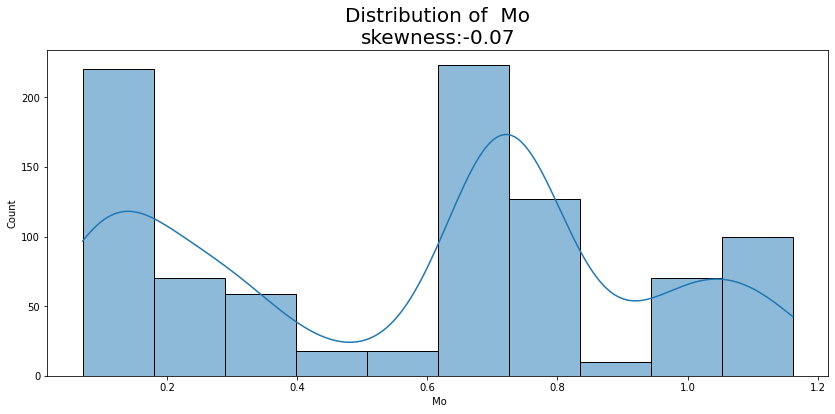

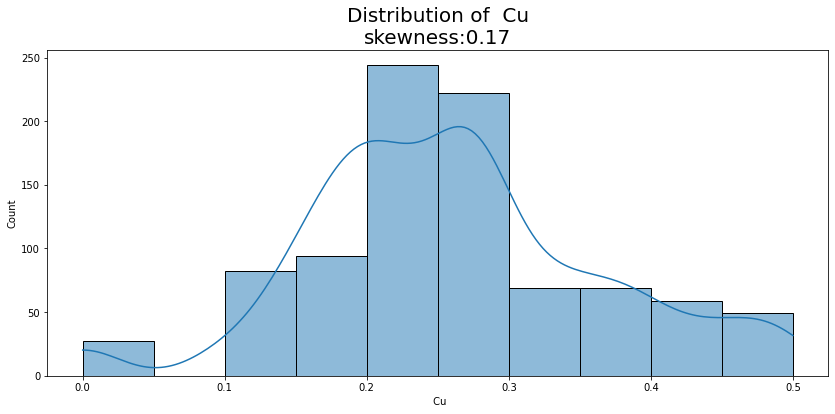

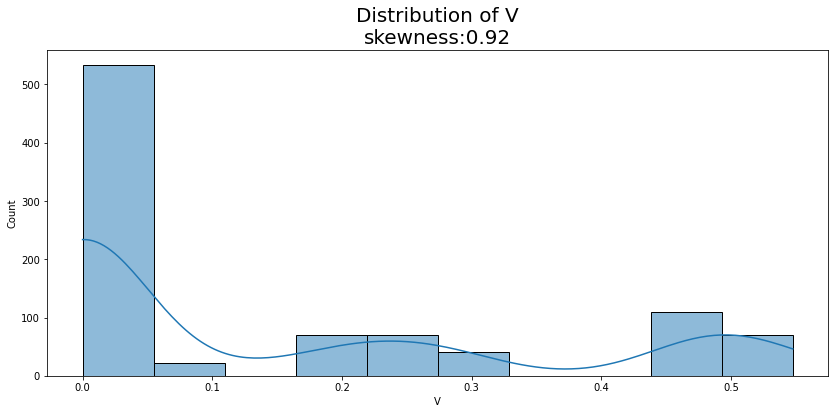

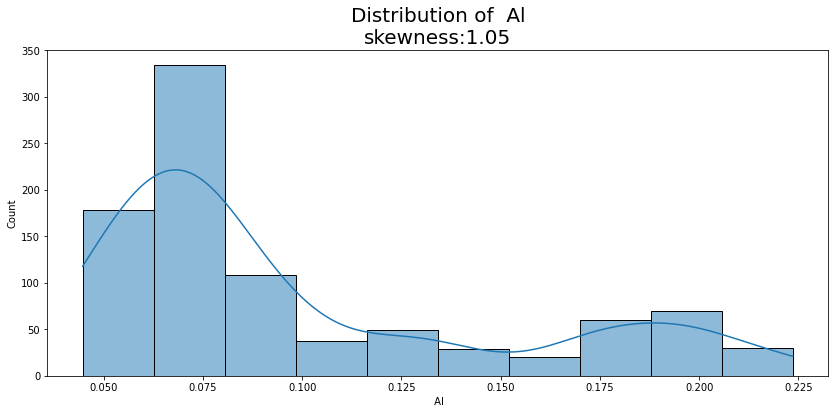

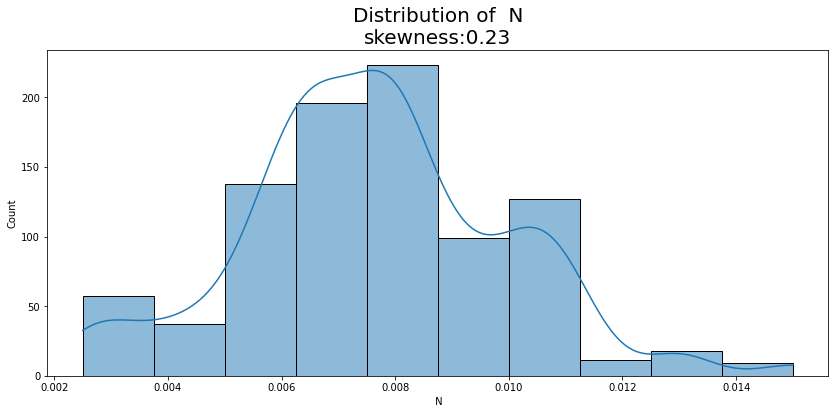

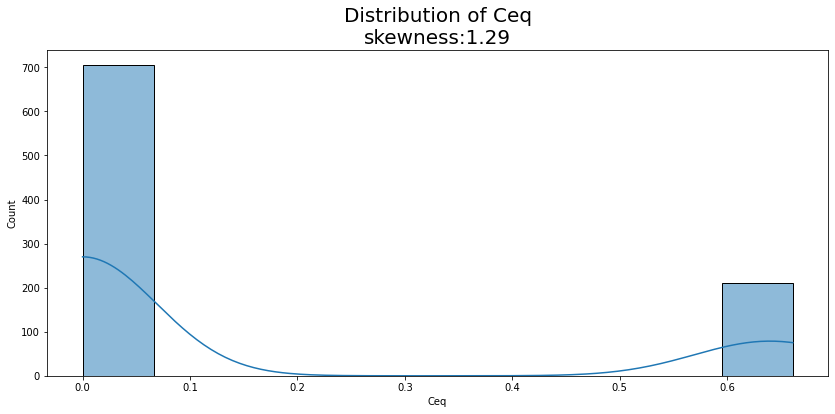

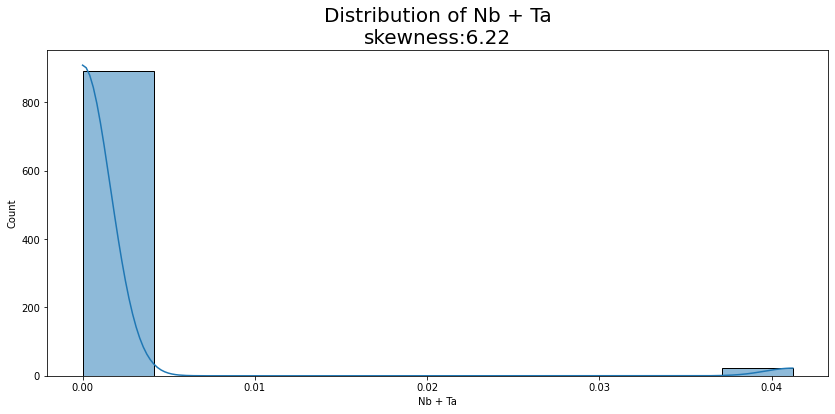

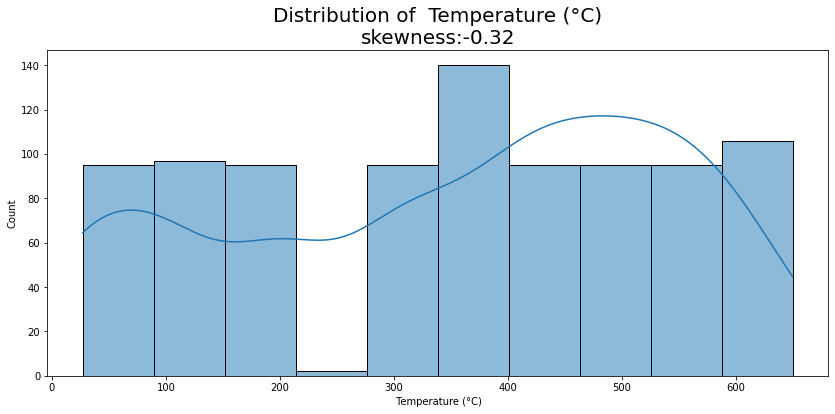

In [23]:
# Distribution of numerical feature columns after square root transform
for col,sk in zip(numerical_cols,skewness_values):
    plt.figure(figsize=(14,6))
    sns.histplot(data=X,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}\nskewness:{sk:.2f}",fontsize=20)

In [24]:
# determine the count and column names that are still skewed
still_skewed_cols=[]
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        still_skewed_cols.append(col)


In [25]:
text="<h3>"+f"There are {len(still_skewed_cols)} still skewed columns and they are:<br>{still_skewed_cols}"+"</h3>"
display(HTML(text))

<h3>Inference:<b>Square root tranform</b> was not successful in correcting the distribution of the numerical columns,going for <b>Box cox transform</b>.

### <span style="color:red"><b>Box-cox Transform</b></span>
<hr>

In [26]:
# determining the skewness values from the original df
skewness_values=df[numerical_cols].skew().to_list()
skewness_values[:3]

[0.9500646425821709, 0.7539201590656879, 0.6062873468418563]

In [27]:
# applying box cox transform
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        X[col]=stats.boxcox(df[col]+1)[0] # one is added as box-cox requires that the values are greater than 0.

In [28]:
# determining the skewness values after box cox transform
skewness_values=X[numerical_cols].skew().to_list()
skewness_values[:3]

[0.13969360690591892, 0.10142679319039109, 0.19162266549671045]

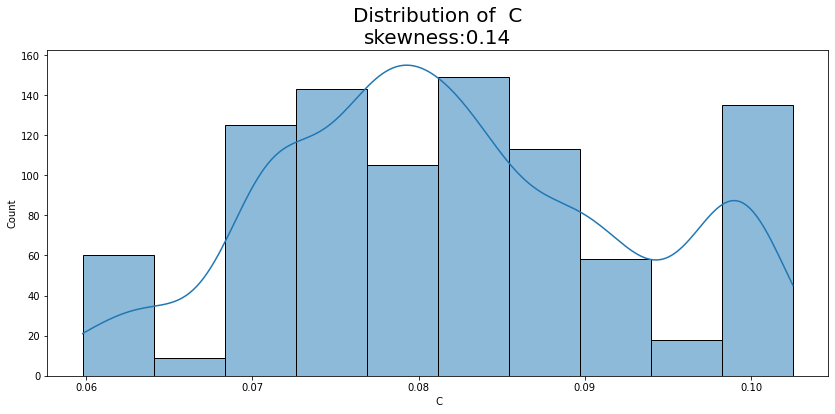

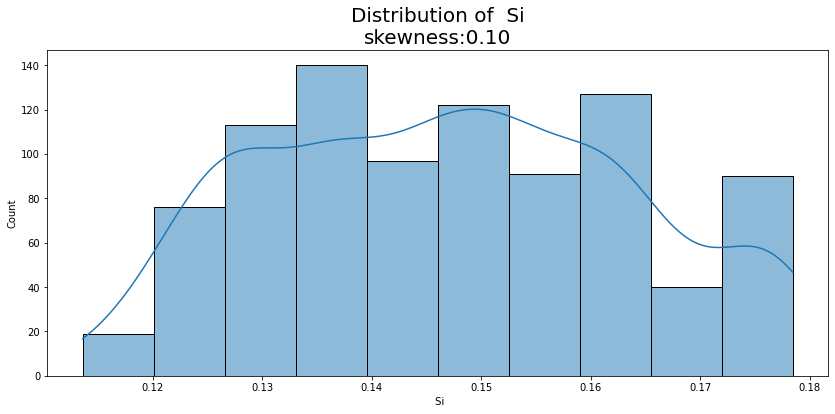

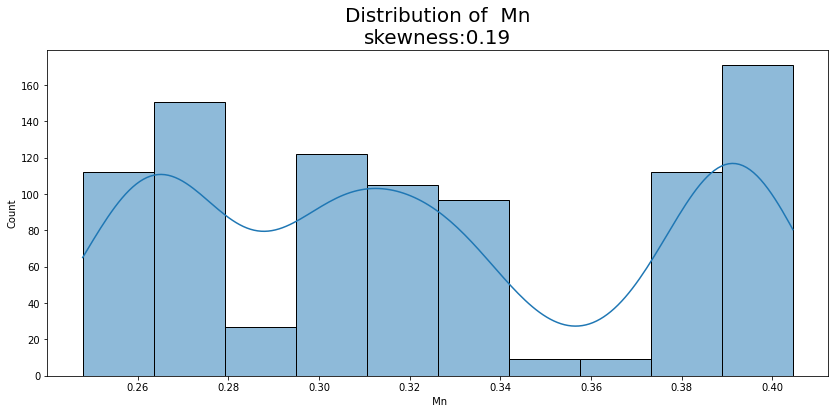

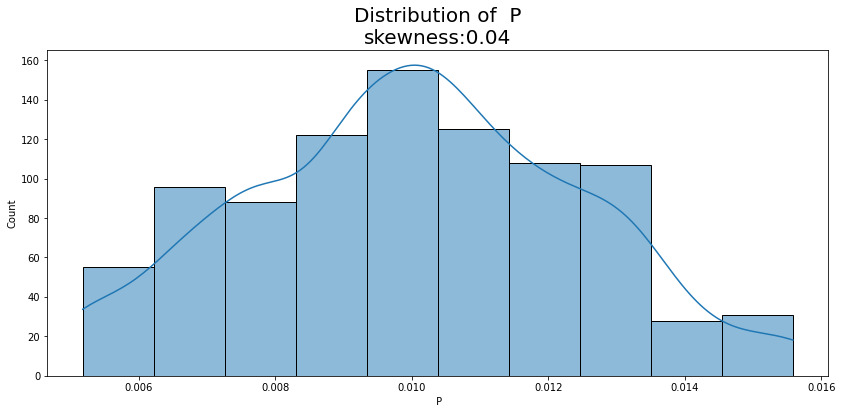

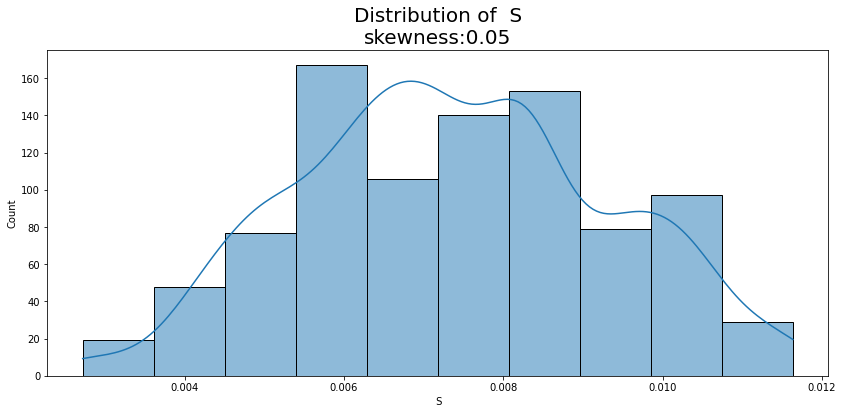

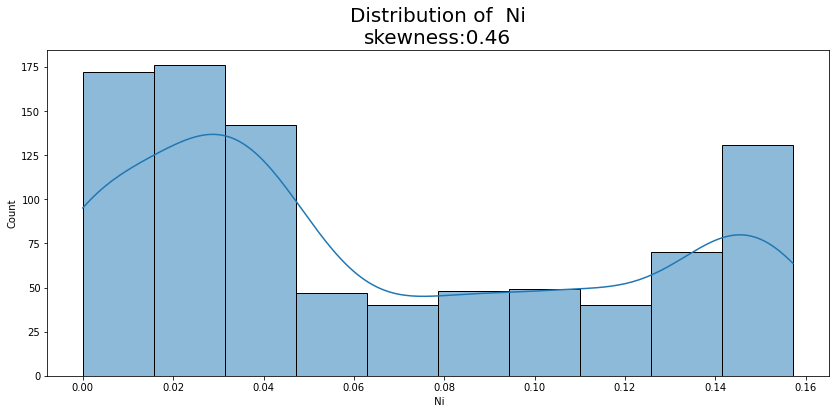

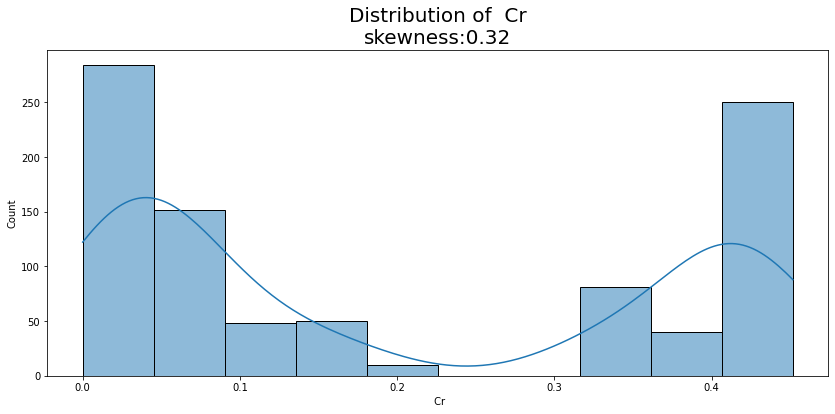

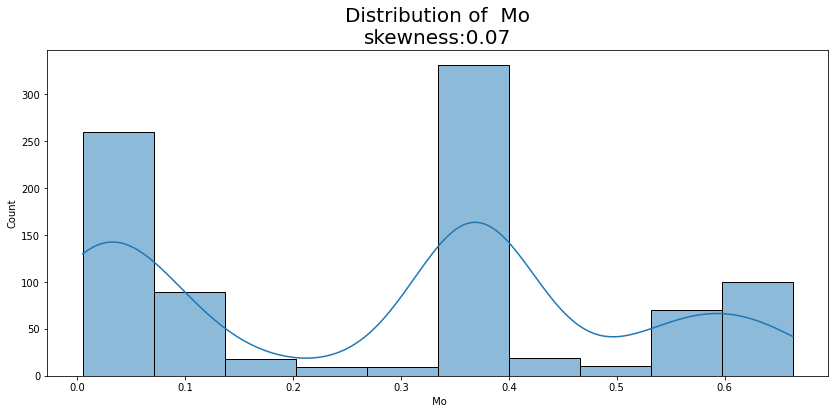

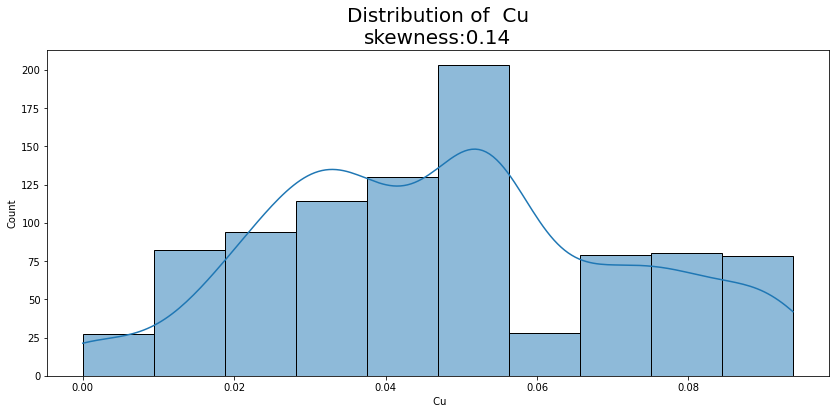

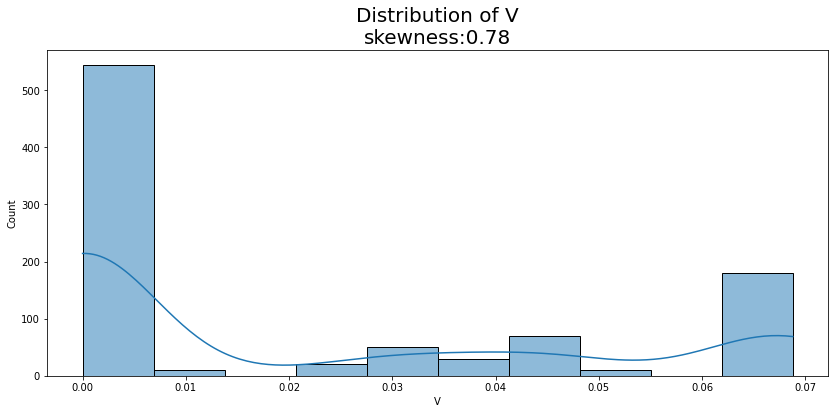

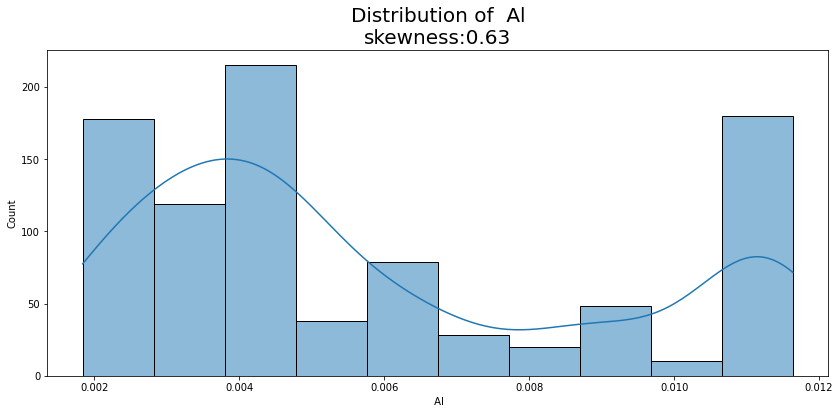

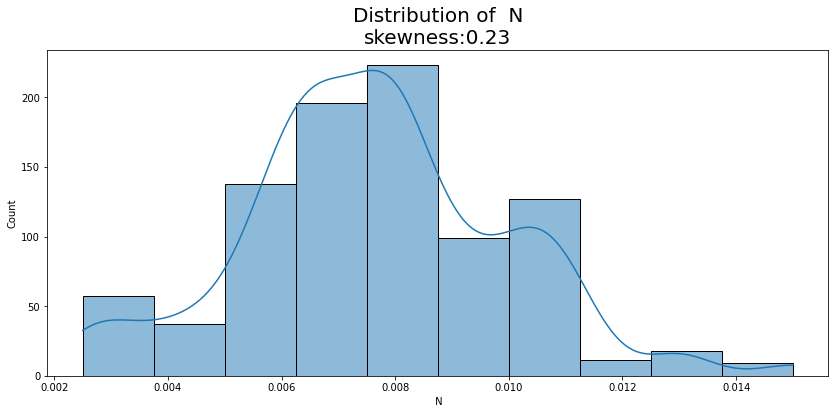

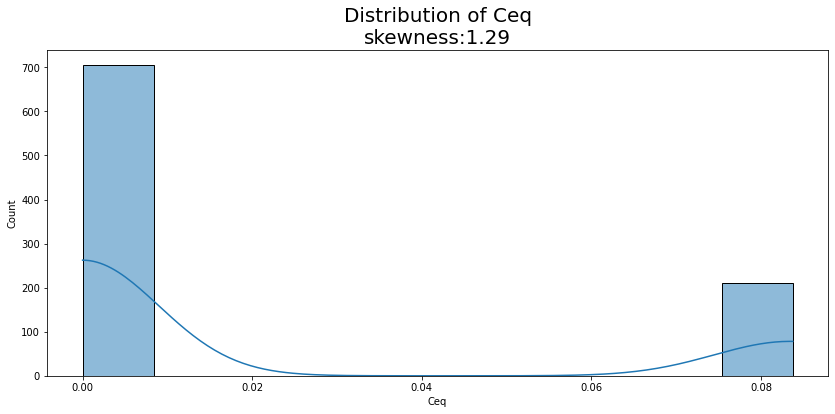

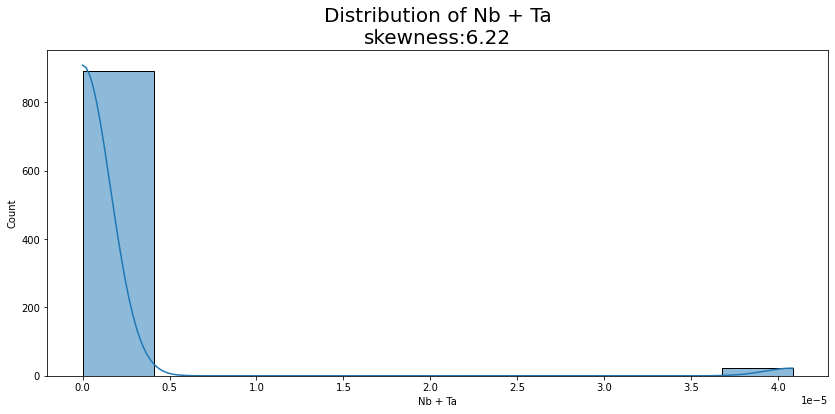

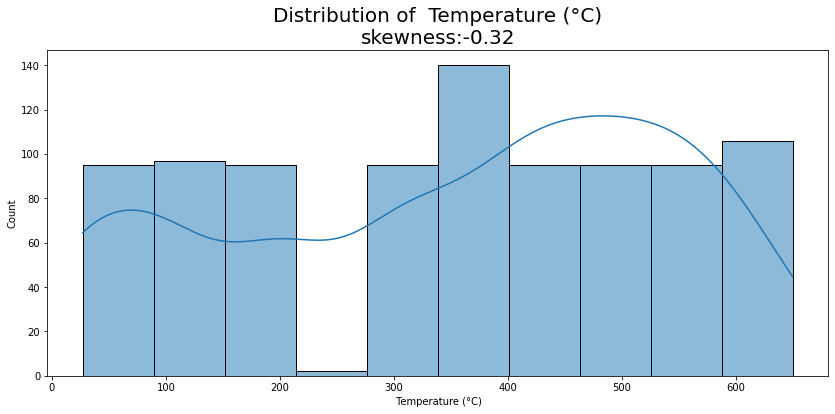

In [29]:
# Distribution of numerical feature columns after Box cox transform
for col,sk in zip(numerical_cols,skewness_values):
    plt.figure(figsize=(14,6))
    sns.histplot(data=X,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}\nskewness:{sk:.2f}",fontsize=20)

In [30]:
# determine the count and column names that are still skewed
still_skewed_cols=[]
for col,sk in zip(numerical_cols,skewness_values):
    if abs(sk)>=0.4:
        still_skewed_cols.append(col)


In [31]:
text="<h3>"+f"There are {len(still_skewed_cols)} still skewed columns and they are:<br>{still_skewed_cols}"+"</h3>"
display(HTML(text))

<h3>Inference:<b>Box cox tranform</b> was quite successful in reducing the number of skewed columns <b>from 12 to 5 </b>.</h3>

### <span style="color:red"><b>Categorical Feature Columns</b></span>
<hr>


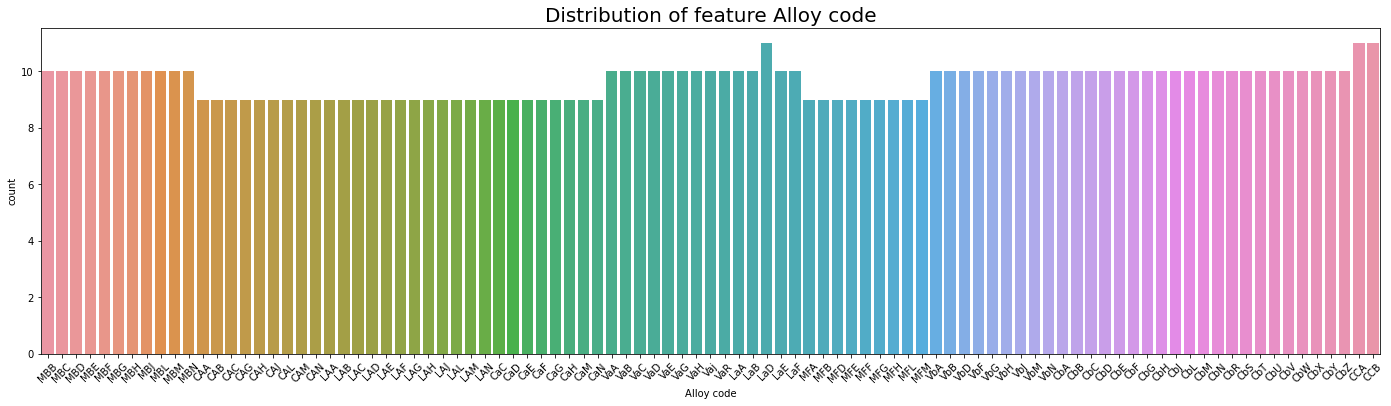

In [32]:
plt.figure(figsize=(24,6))
sns.countplot(data=X,x='Alloy code');
plt.title("Distribution of feature Alloy code",fontsize=20)
plt.xticks(rotation=45);

<h3>Inference:There are uniform number of training examples from each category which is also beneficial for enhancing performance of the model.</h3>

### <span style="color:red"><b>Numerical Target columns</b></span>
<hr>


In [33]:
# clubing together all the target columns
target_cols=y.columns.to_list()
target_cols

[' 0.2% Proof Stress (MPa)',
 ' Tensile Strength (MPa)',
 ' Elongation (%)',
 ' Reduction in Area (%)']

In [34]:
# determining the skewness values from the original df
target_col_skewness_values=df[target_cols].skew().to_list()
target_col_skewness_values

[0.5726790700681965,
 18.643229584281986,
 1.2196767490893583,
 -0.5093220913278245]

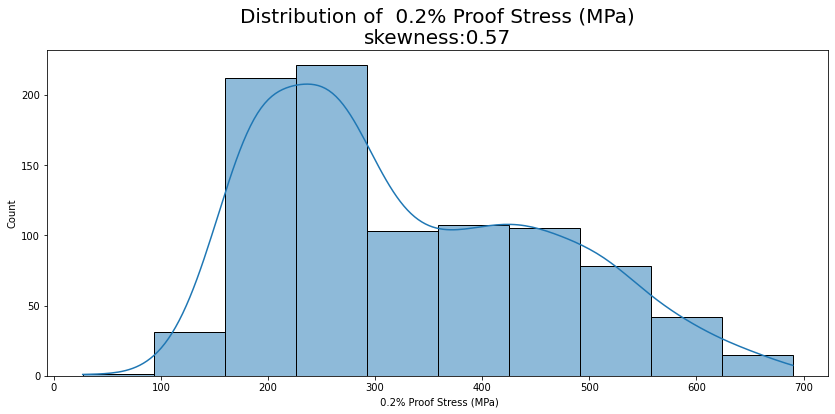

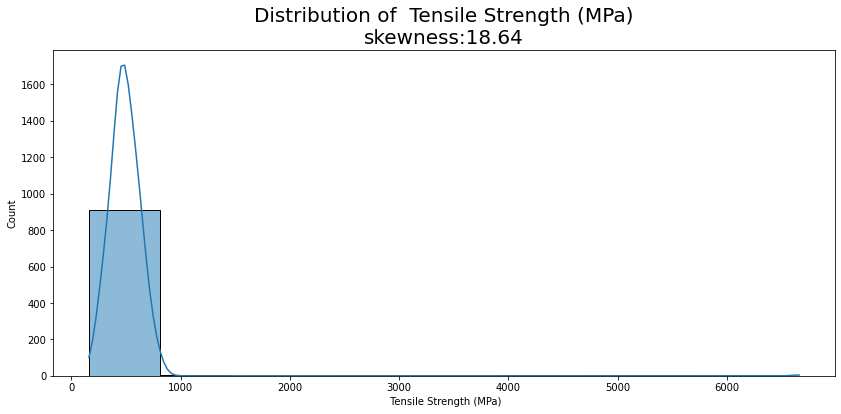

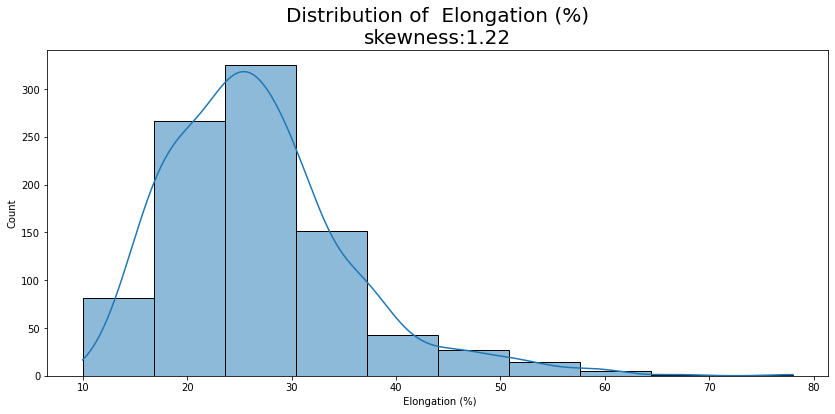

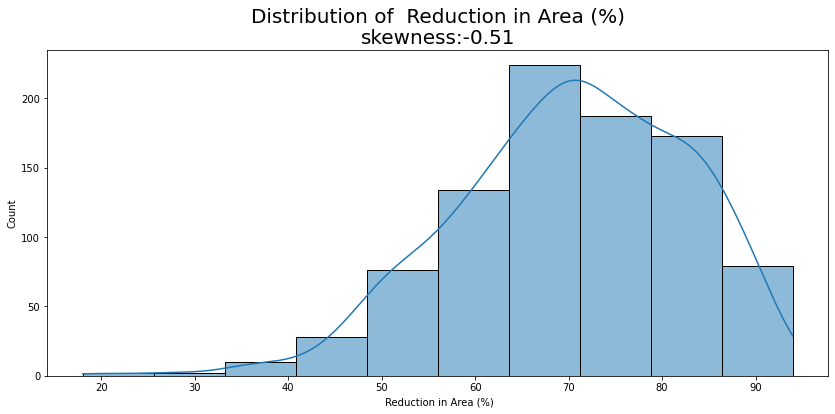

In [35]:
# Distribution of target columns
for col,sk in zip(target_cols,target_col_skewness_values):
    plt.figure(figsize=(14,6))
    sns.histplot(data=y,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}\nskewness:{sk:.2f}",fontsize=20)

In [36]:
# counting the listing the skewed columns.
skewed_target_cols=[]
for col,sk in zip(target_cols,target_col_skewness_values):
    if abs(sk)>=0.4:
        skewed_target_cols.append(col)

In [37]:
text="<h3>"+f"There are {len(skewed_target_cols)} skewed columns and they are:<br>{skewed_target_cols}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>log Transform</b></span>
<hr>


In [38]:
# applying box cox transform
for col,sk in zip(target_cols,target_col_skewness_values):
    if abs(sk)>=0.4:
        y[col]=np.log1p(df[col]) 


In [39]:
# determining the skewness values after box cox transform
target_col_skewness_values=y[target_cols].skew().to_list()
target_col_skewness_values

[-0.1860317792767588,
 0.28681551929271265,
 0.17267963661536218,
 -1.3548149987591747]

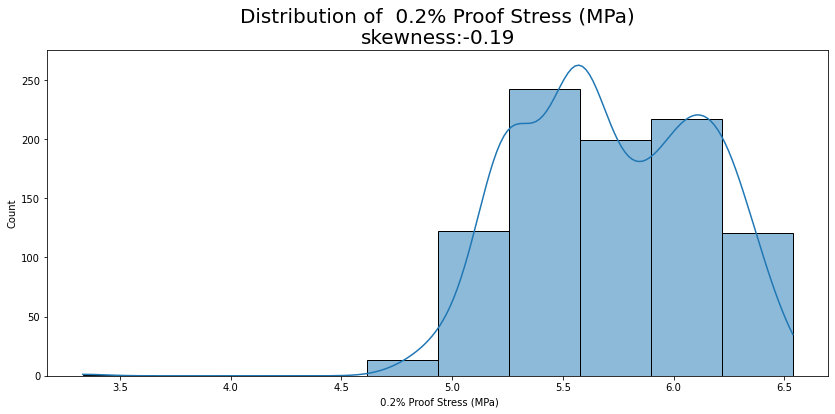

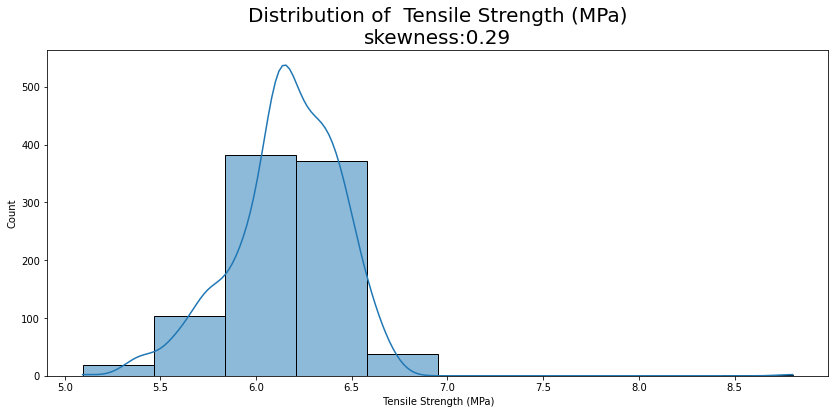

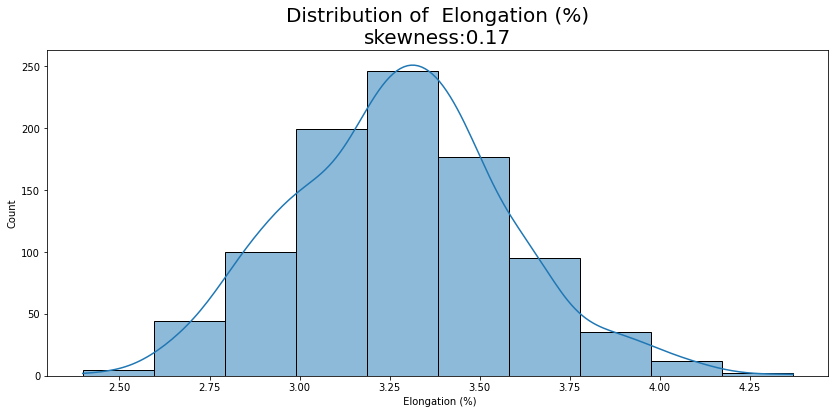

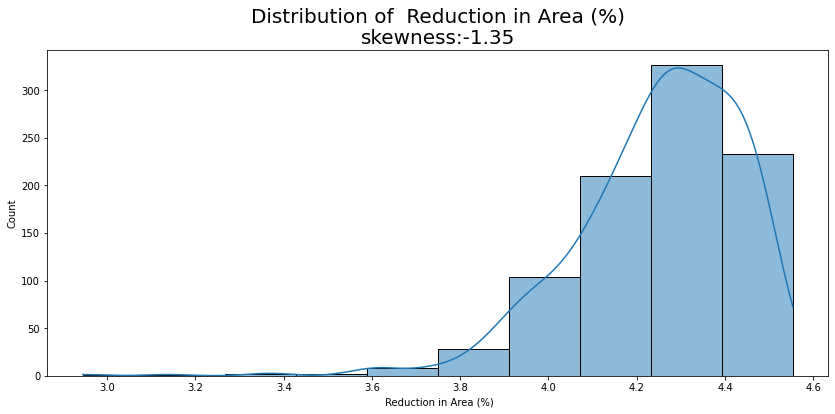

In [40]:
# Distribution after Box cox transform
for col,sk in zip(target_cols,target_col_skewness_values):
    plt.figure(figsize=(14,6))
    sns.histplot(data=y,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}\nskewness:{sk:.2f}",fontsize=20)

In [41]:
# determine the count and column names that are still skewed
still_skewed_target_cols=[]
for col,sk in zip(target_cols,target_col_skewness_values):
    if abs(sk)>=0.4:
        still_skewed_target_cols.append(col)


In [42]:
text="<h3>"+f"There is {len(still_skewed_target_cols)} still skewed column and it  is:<br>{still_skewed_target_cols}"+"</h3>"
display(HTML(text))

<h3>Inference:<b>Log transform</b> was successful in reducing the number of <b>skewed target columns from 4 to 1</b>.

## <span style="color:red"><b>Bivariate Analysis</b></span>
<hr>



In [43]:
target_cols

[' 0.2% Proof Stress (MPa)',
 ' Tensile Strength (MPa)',
 ' Elongation (%)',
 ' Reduction in Area (%)']

### <span style="color:red"><b>Numerical features impact on `' 0.2% Proof Stress (MPa)'`</b></span>
<hr>


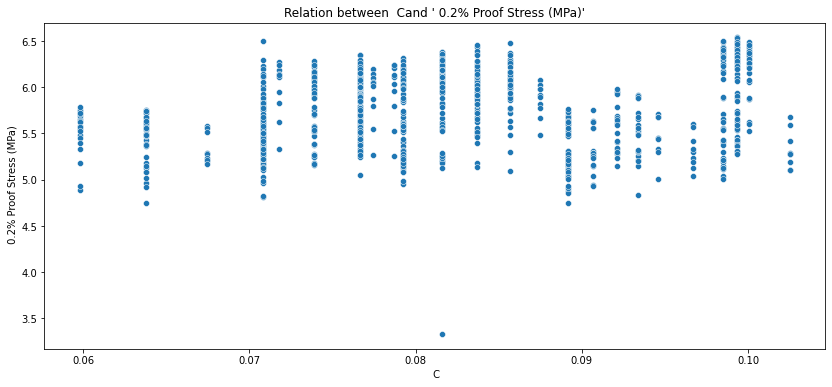

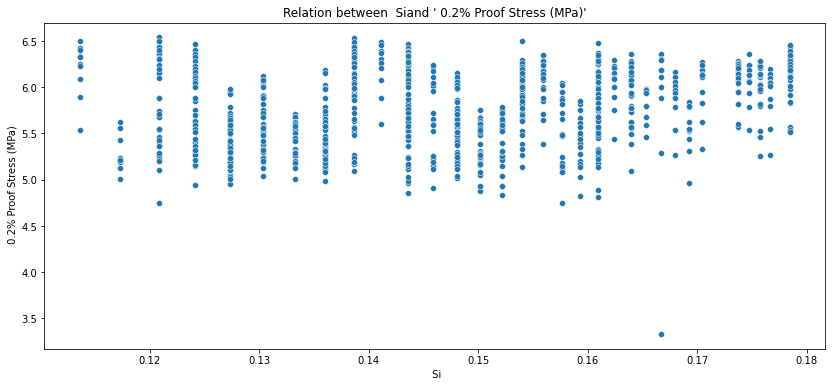

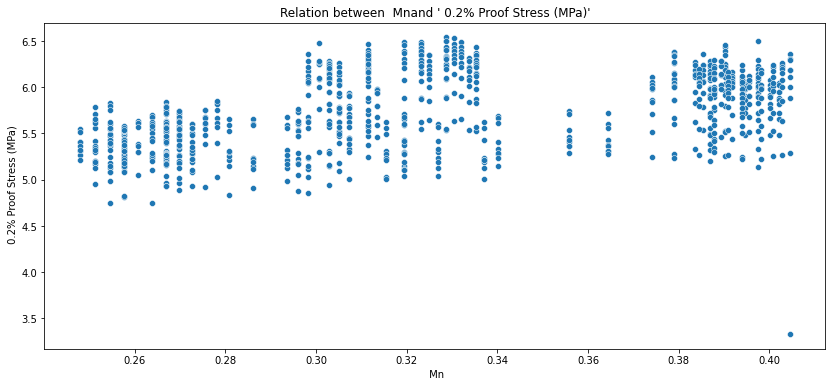

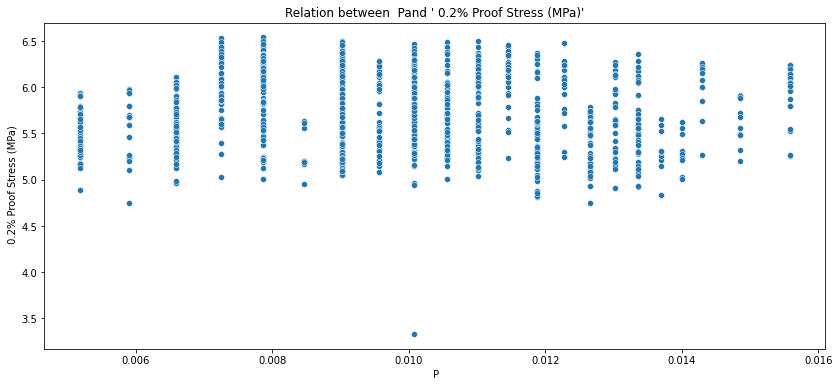

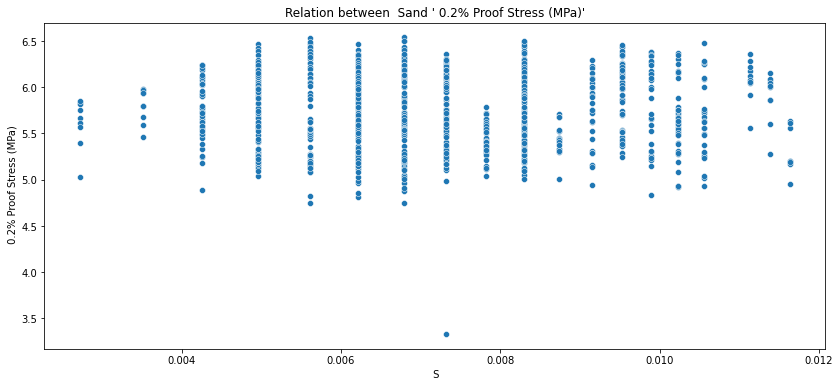

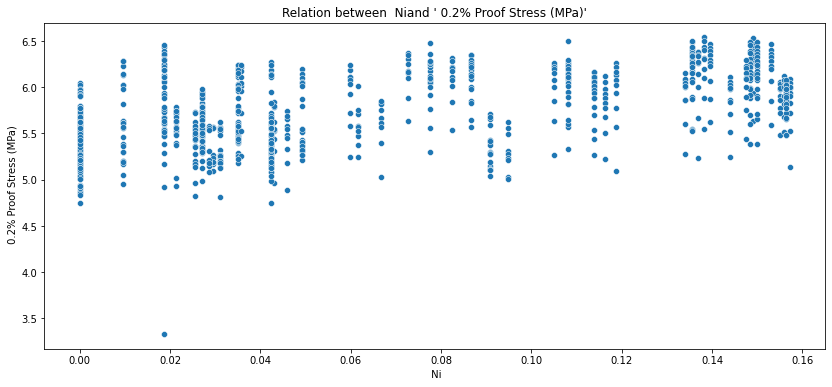

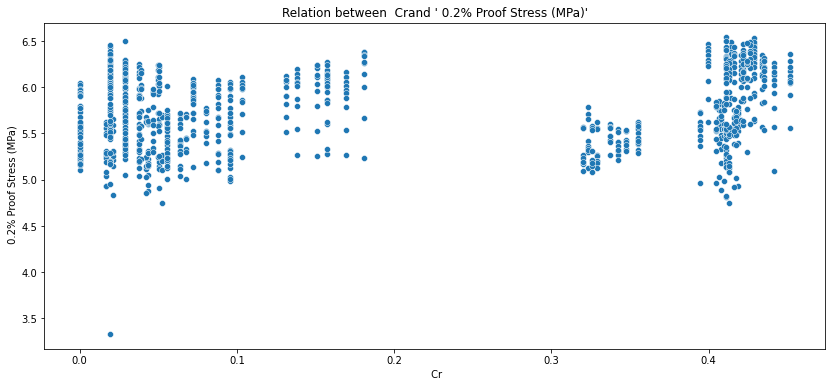

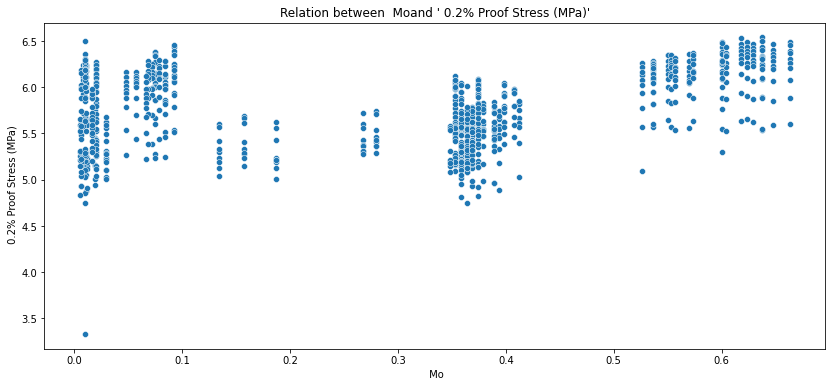

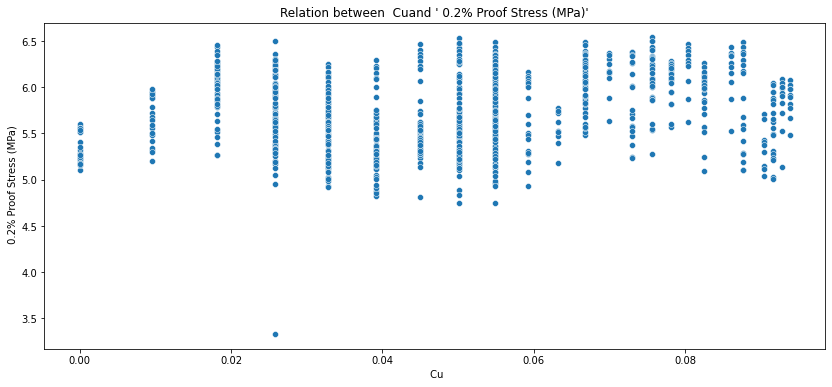

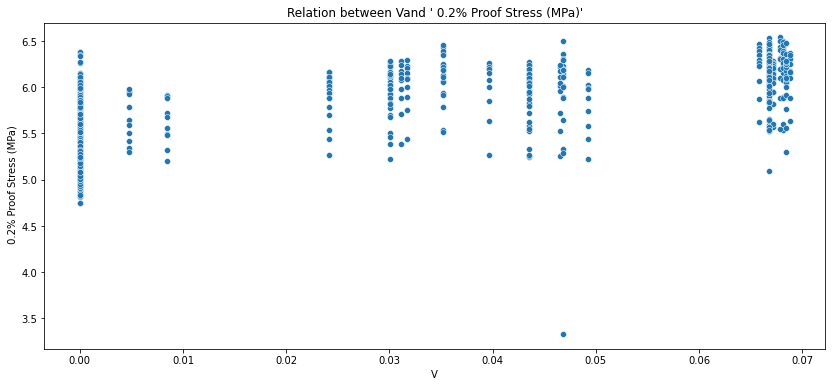

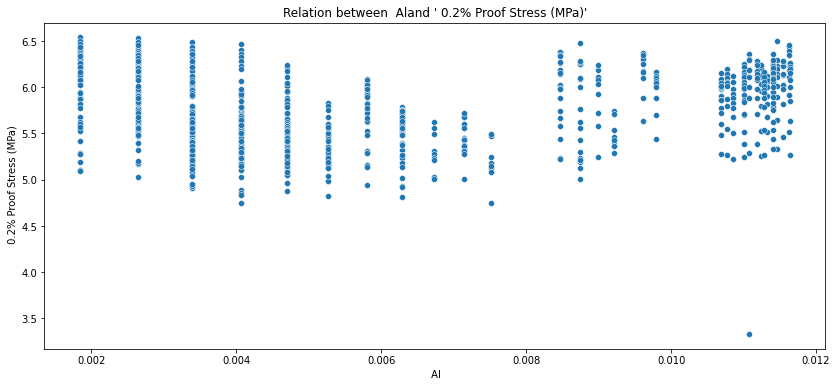

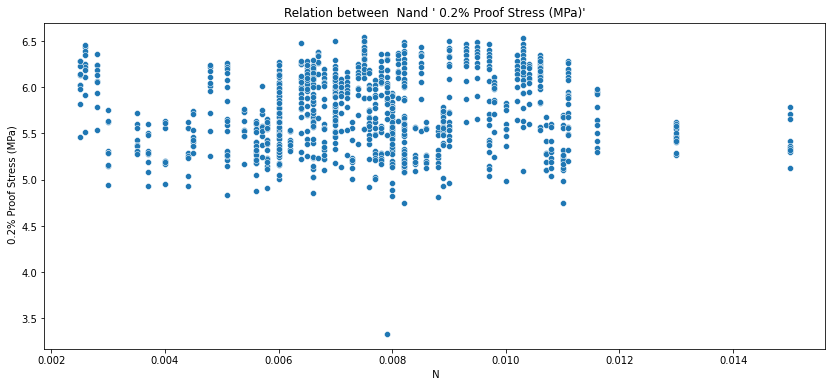

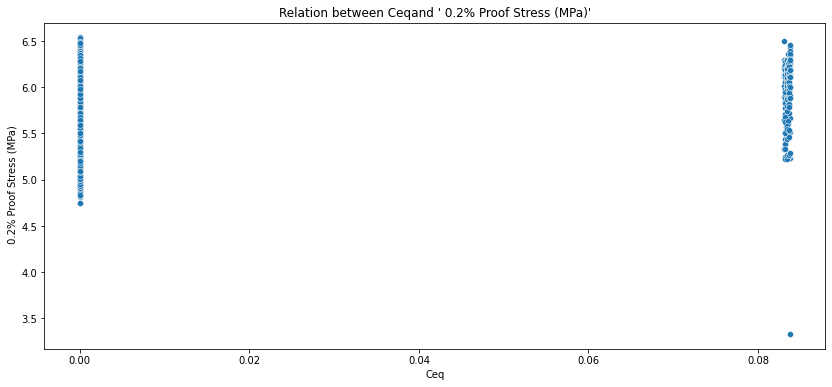

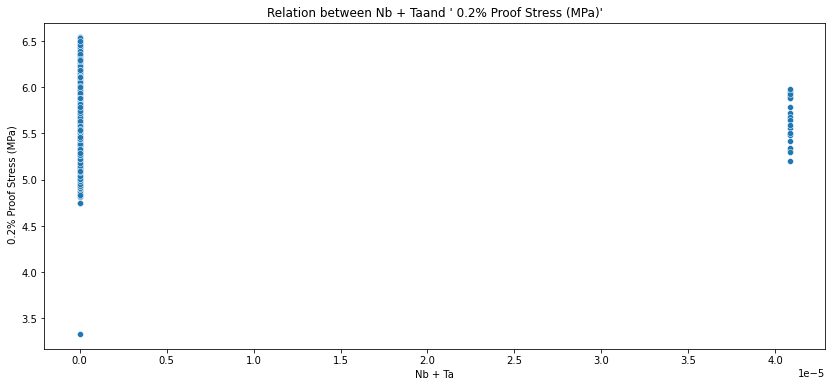

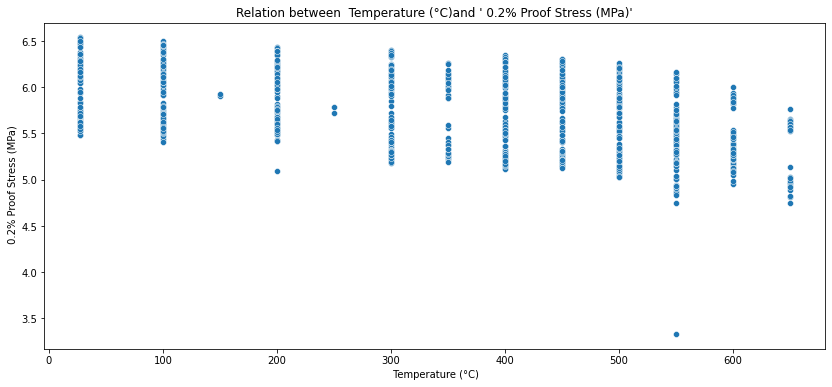

In [44]:
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.scatterplot(x=X[col],y=y[' 0.2% Proof Stress (MPa)'])
    plt.title(f"Relation between {col}and ' 0.2% Proof Stress (MPa)'")

<h3>Inference: As Temperature increases <b>0.2% Proof Stress (MPa)</b> decreases slightly.</h3>

In [45]:
combined_df=pd.concat([X,y],axis=1)
combined_df.head()

Alloy code         C        Si        Mn         P         S        Ni  \
0        MBB  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
1        MBB  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
2        MBB  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
3        MBB  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
4        MBB  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   

        Cr        Mo        Cu    V        Al       N  Ceq  Nb + Ta  \
0  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
1  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
2  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
3  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
4  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   

    Temperature (°C)   0.2% Proof Stress (MPa)   Tensile Strength (MPa)  \
0                 27                  5.837730                 6.196444   
1                100                  5.826000                 6.120297   
2                200                  5.823046                 6.144186   
3                300                  5.849325                 6.206576   
4                400                  5.758902                 6.194405   

    Elongation (%)   Reduction in Area (%)  
0         3.433987                4.276666  
1         3.332205                4.290459  
2         3.178054                4.248495  
3         3.091042                4.262680  
4         3.295837                4.382027

### <span style="color:red"><b>Categorical feature impact on `' 0.2% Proof Stress (MPa)'`</b></span>
<hr>




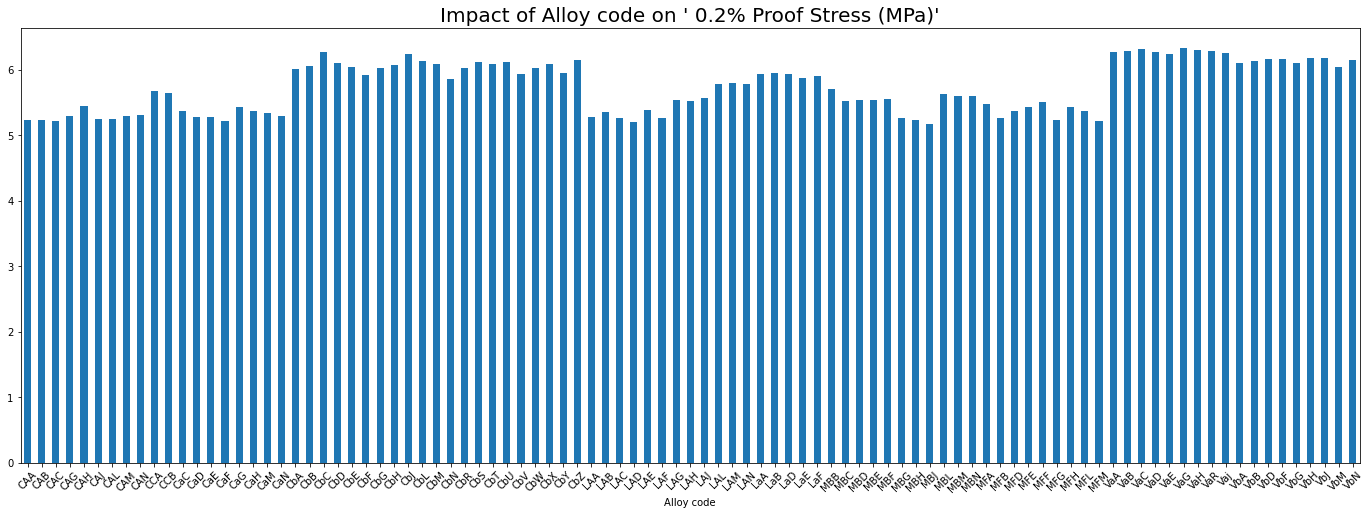

In [46]:

combined_df.groupby('Alloy code')[' 0.2% Proof Stress (MPa)'].median().plot(kind='bar',figsize=(24,8));
plt.title("Impact of Alloy code on ' 0.2% Proof Stress (MPa)'",fontsize=20)
plt.xticks(rotation=45);

<h3>Inference: Obervational trend observed.</h3>

### <span style="color:red"><b>Numerical features impact on `' Tensile Strength (MPa)'`</b></span>
<hr>




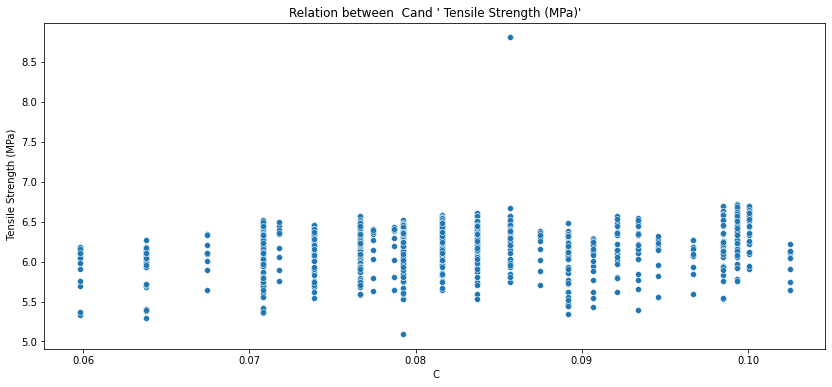

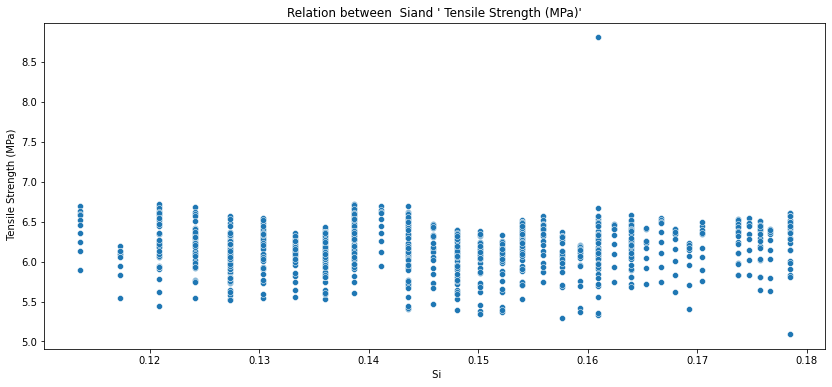

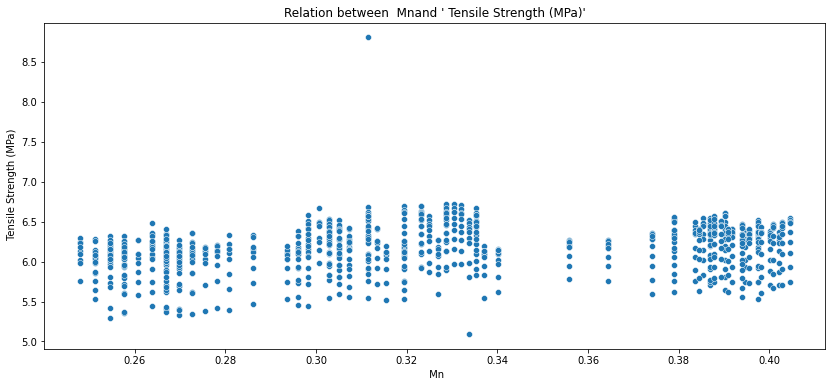

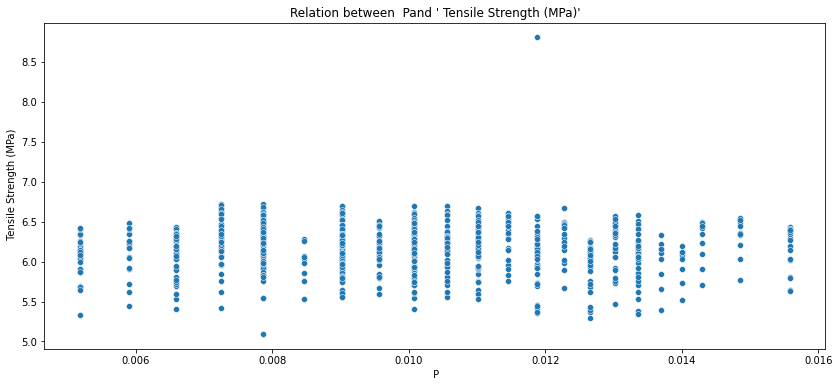

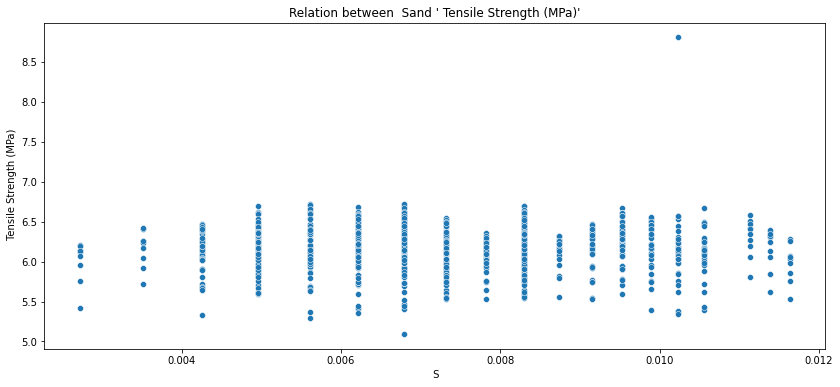

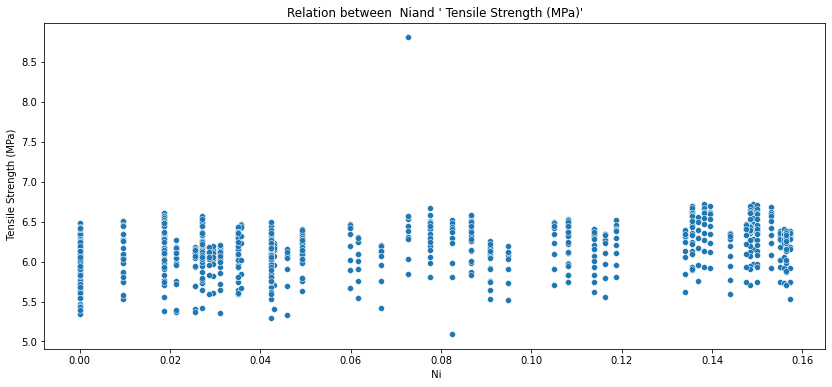

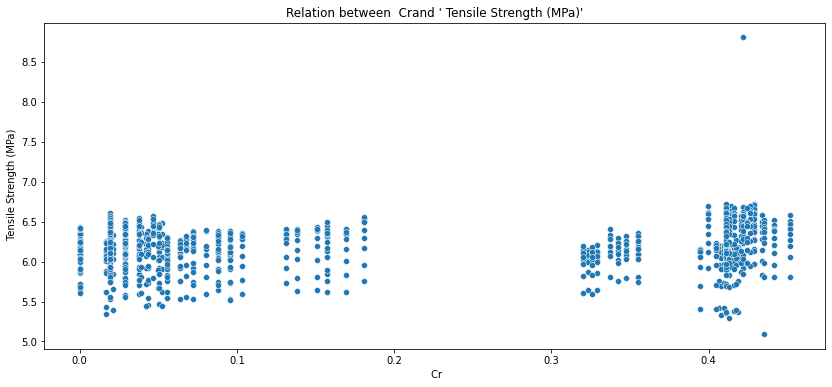

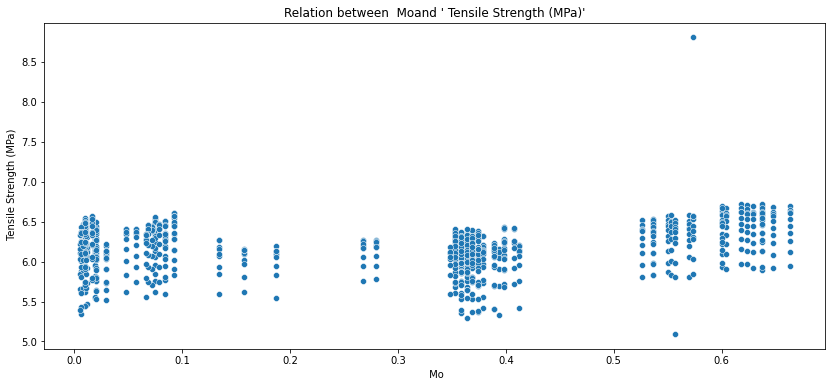

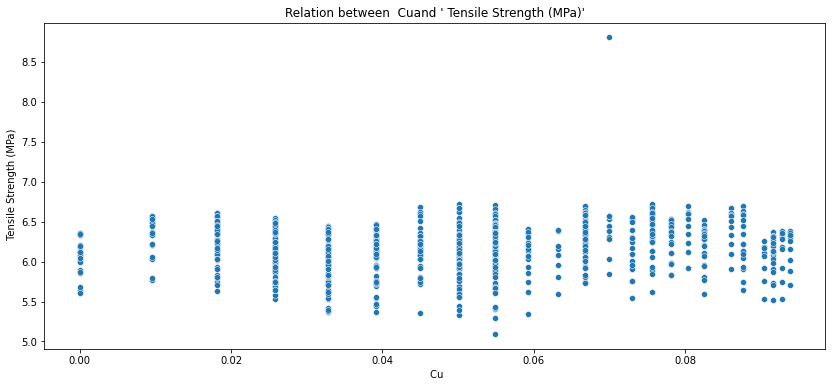

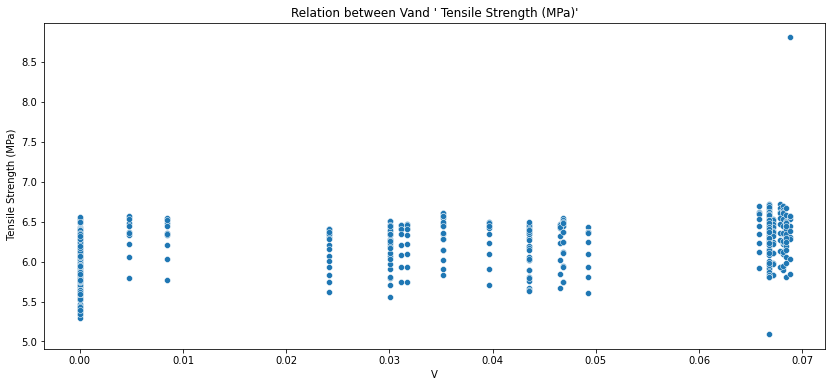

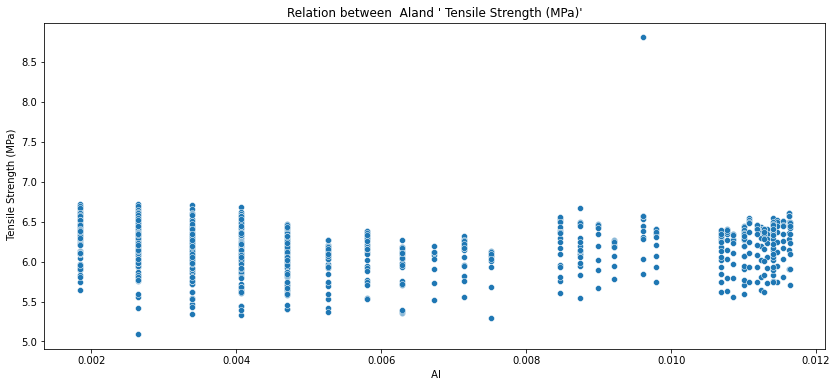

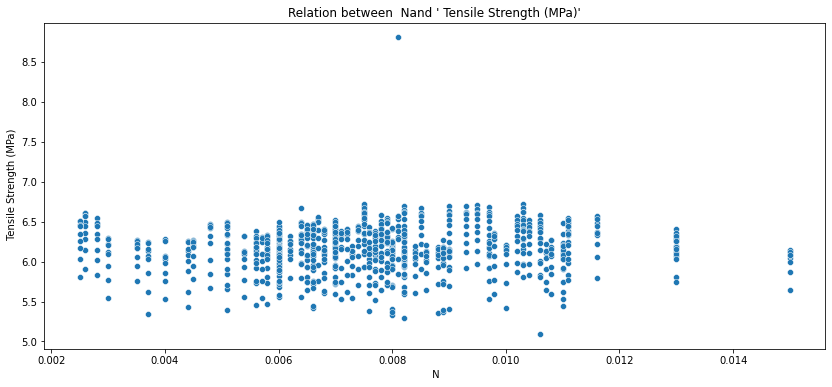

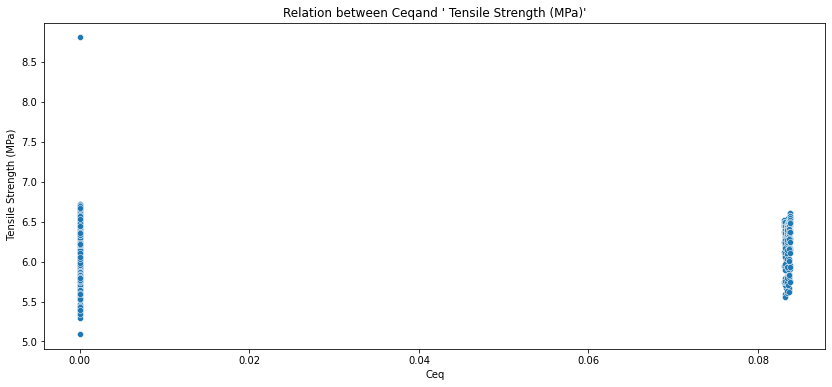

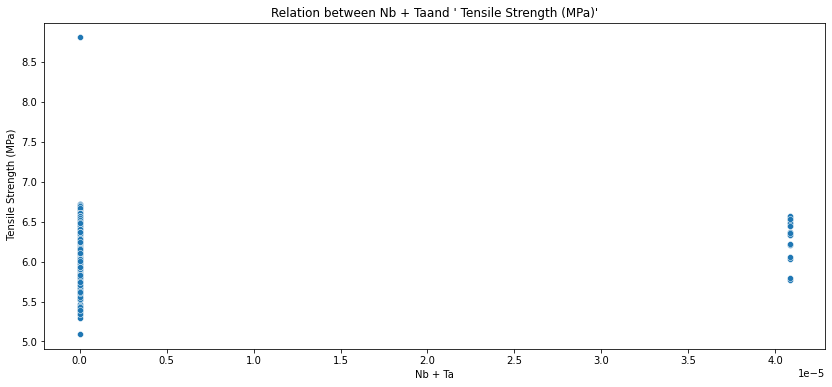

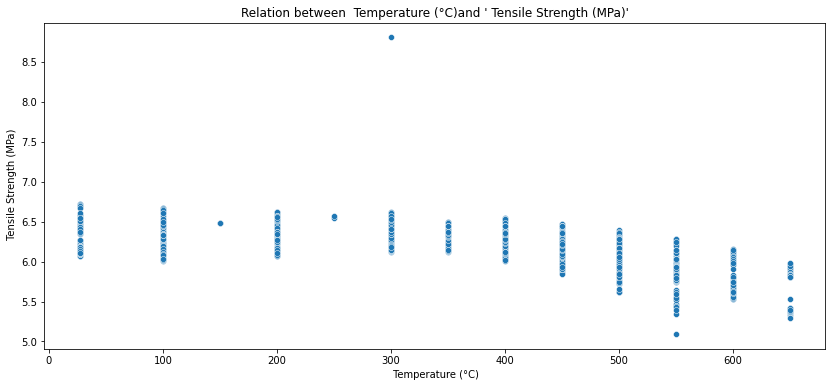

In [47]:
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.scatterplot(x=X[col],y=y[' Tensile Strength (MPa)'])
    plt.title(f"Relation between {col}and ' Tensile Strength (MPa)'")

<h3>Inference:Observable trend as temperature increases <b> Tensile Strength (MPa)</b> decreases.</h3>

### <span style="color:red"><b>Categorical feature impact on `' Tensile Strength (MPa)'`</b></span>
<hr>


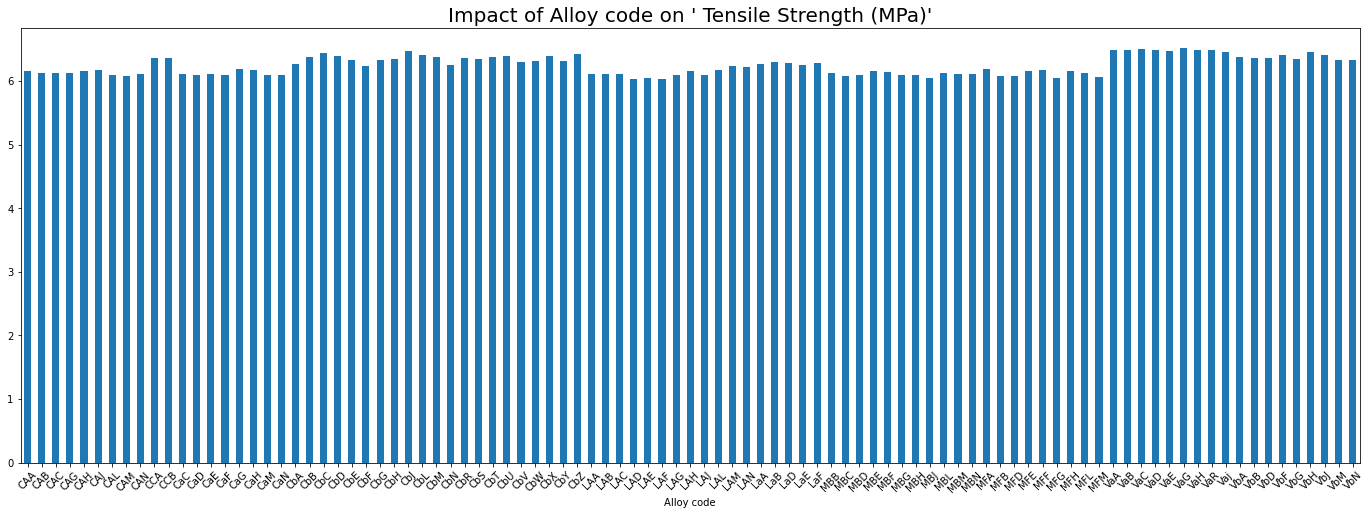

In [48]:
combined_df.groupby('Alloy code')[' Tensile Strength (MPa)'].median().plot(kind='bar',figsize=(24,8));
plt.title("Impact of Alloy code on ' Tensile Strength (MPa)'",fontsize=20)
plt.xticks(rotation=45);

<h3>Inference:No Obervational trend observed.</h3>

### <span style="color:red"><b>Numerical features impact on `' Elongation (%)'`</b></span>
<hr>


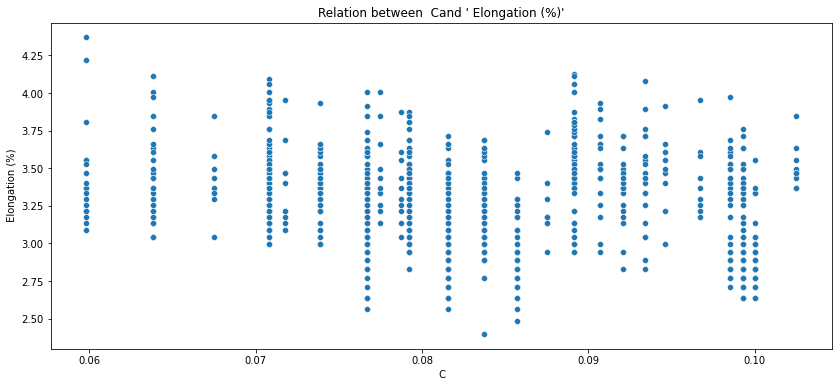

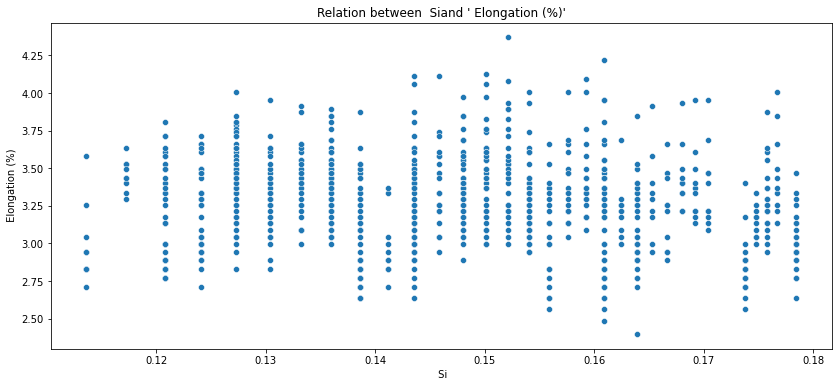

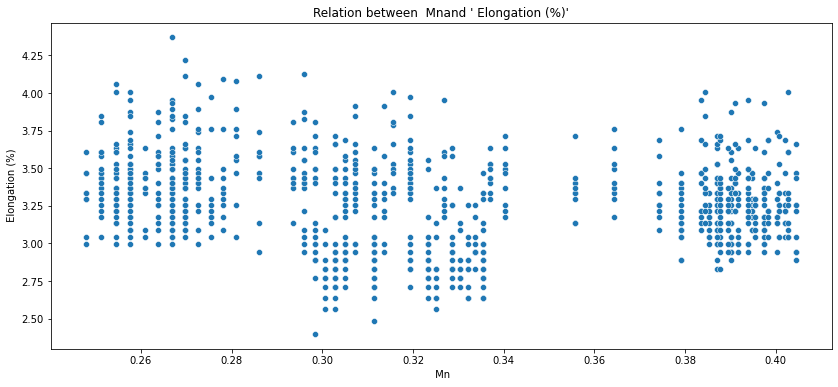

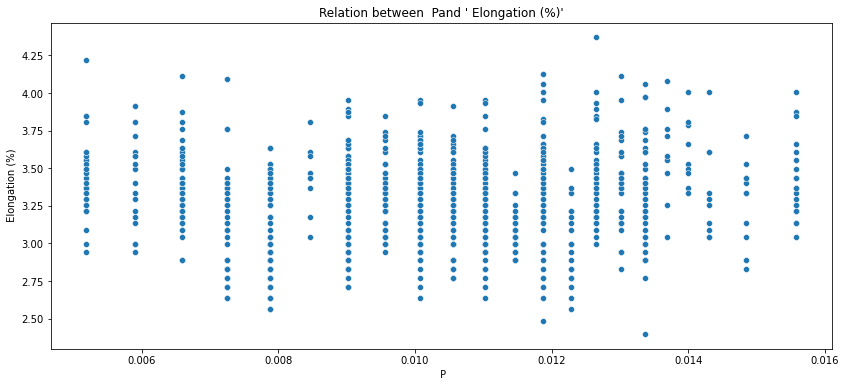

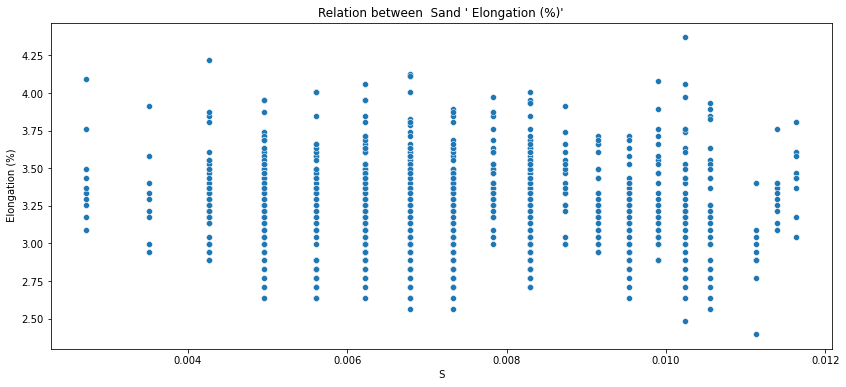

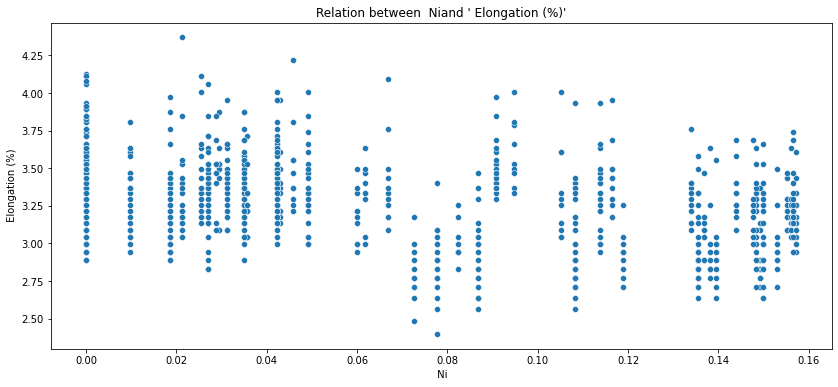

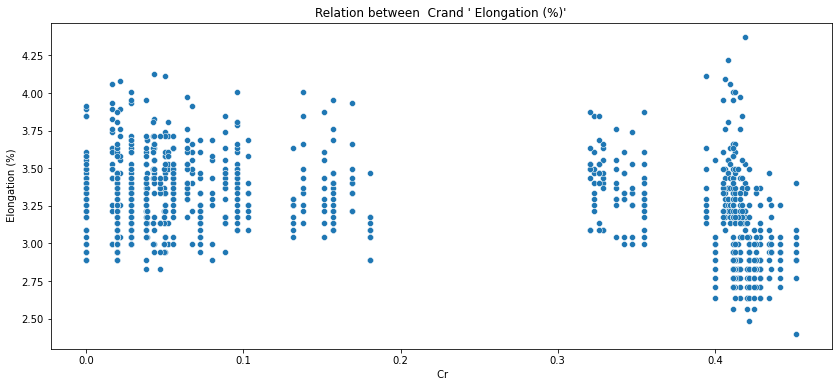

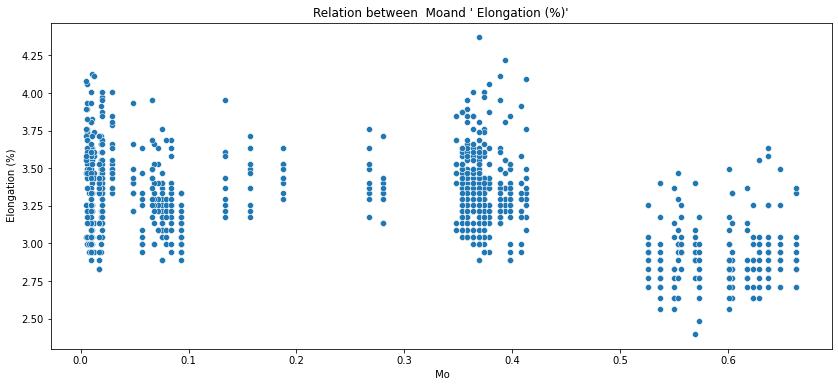

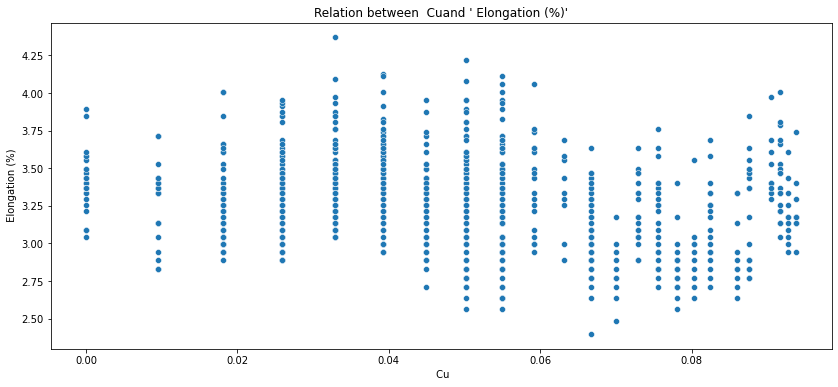

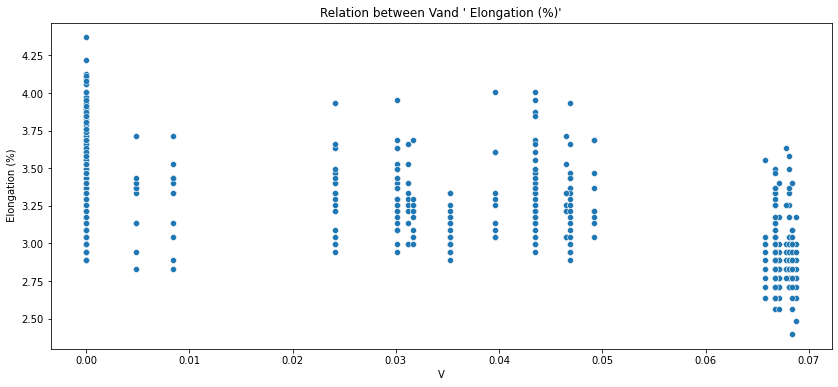

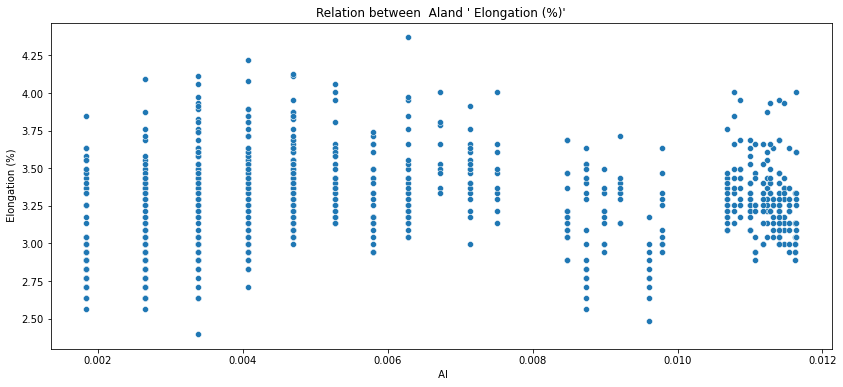

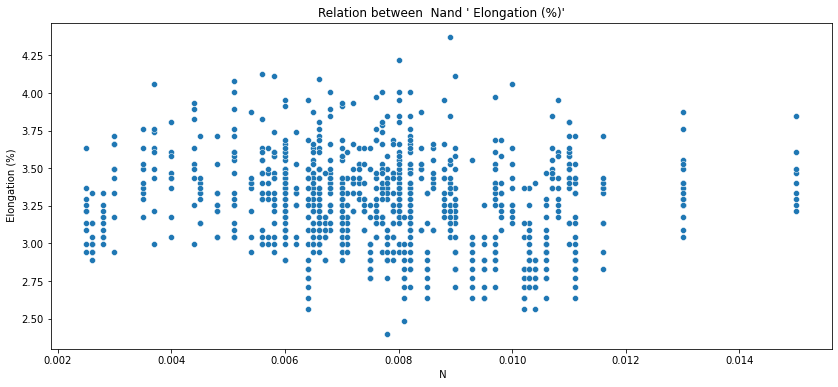

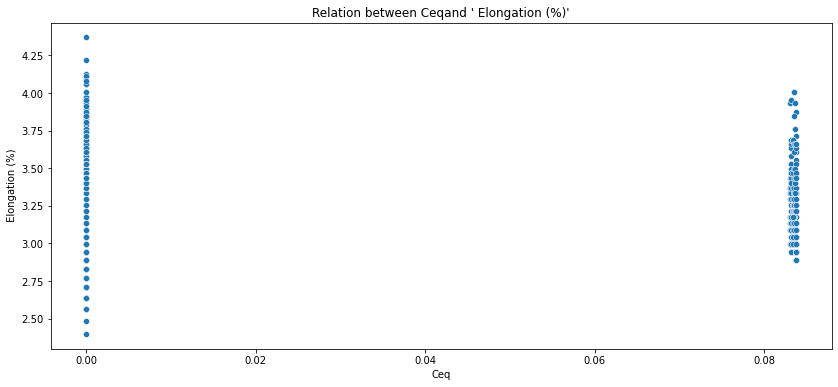

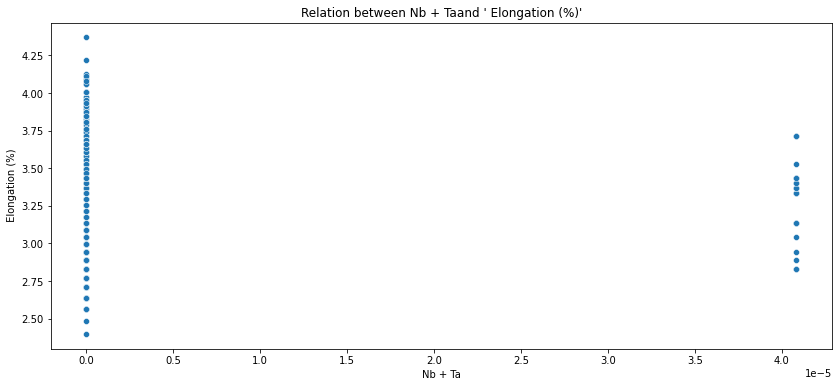

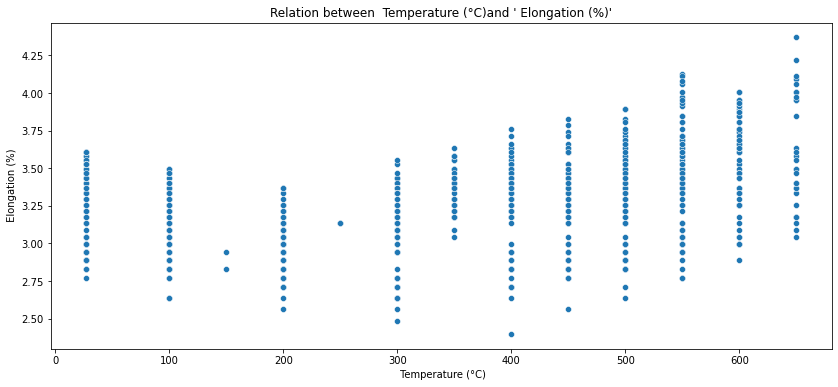

In [49]:
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.scatterplot(x=X[col],y=y[' Elongation (%)'])
    plt.title(f"Relation between {col}and ' Elongation (%)'")

<h3>Inference:No trend.</h3>

### <span style="color:red"><b>Categorical feature impact on `' Elongation (%)'`</b></span>
<hr>


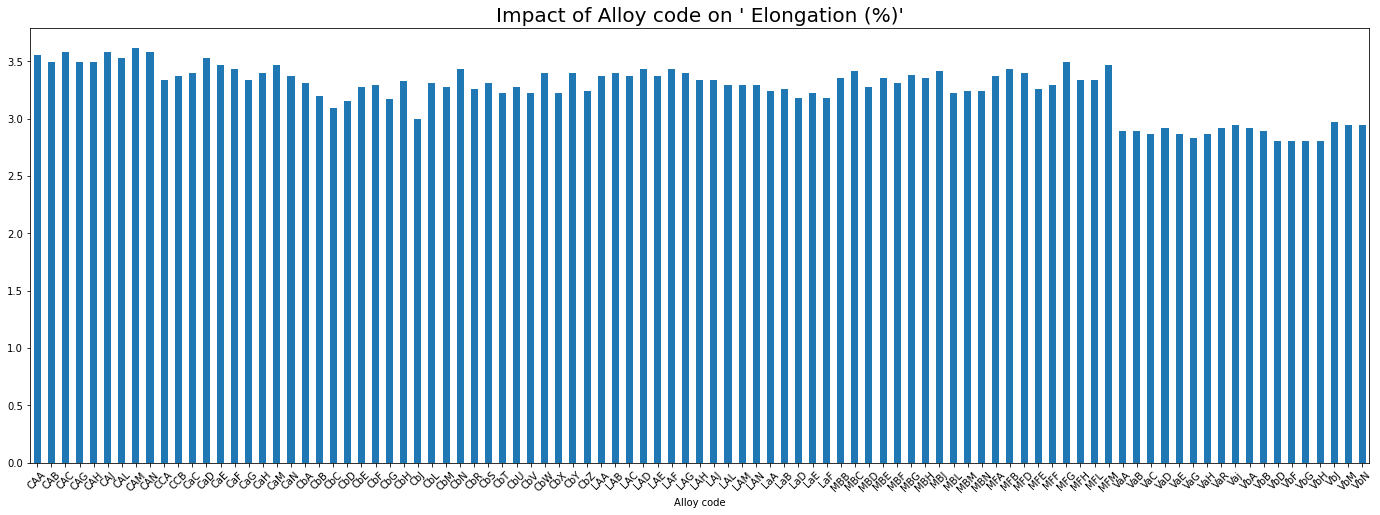

In [50]:
combined_df.groupby('Alloy code')[' Elongation (%)'].median().plot(kind='bar',figsize=(24,8));
plt.title("Impact of Alloy code on ' Elongation (%)'",fontsize=20)
plt.xticks(rotation=45);

<h3>Inference:Observational trend seen.</h3>

### <span style="color:red"><b>Numerical feature impact on `' Reduction in Area (%)'`</b></span>
<hr> 

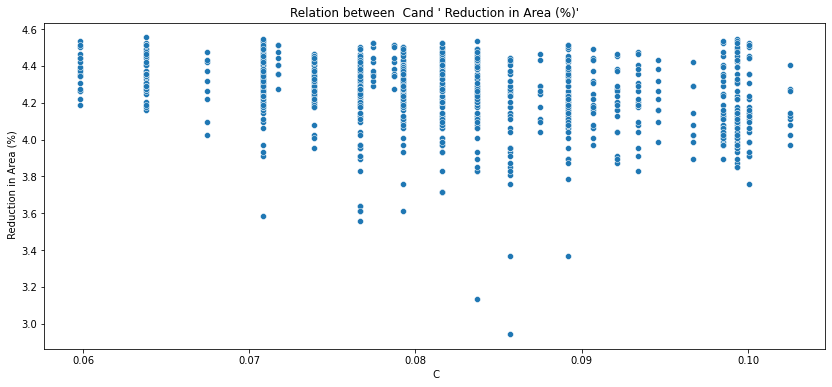

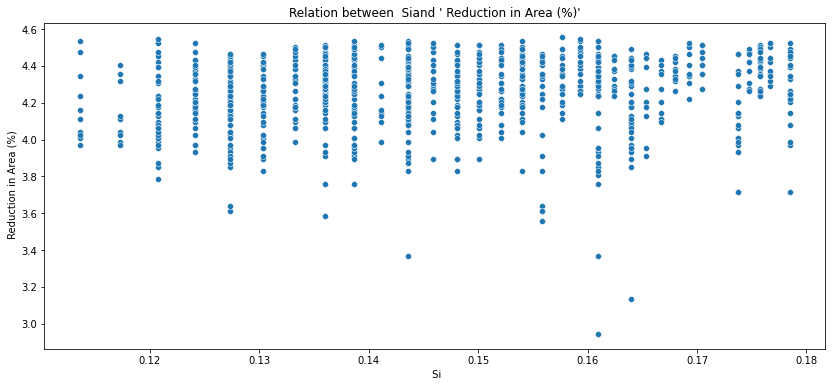

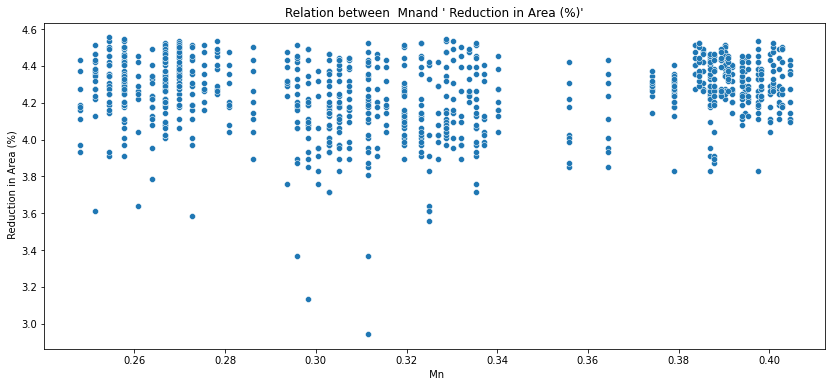

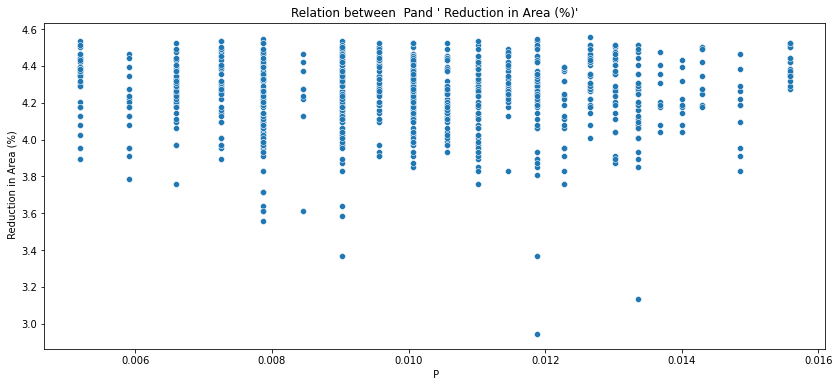

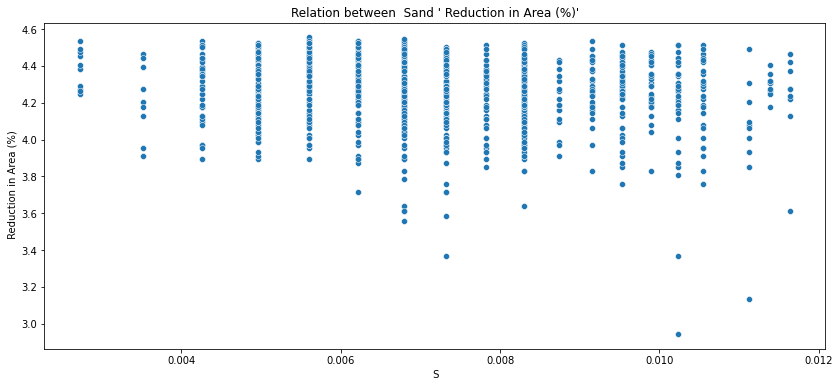

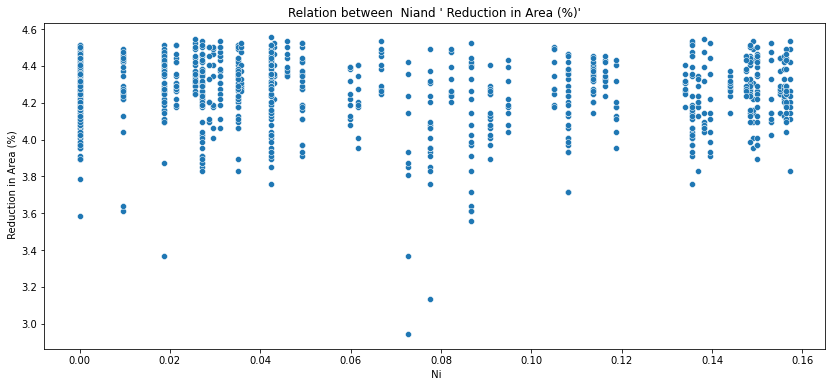

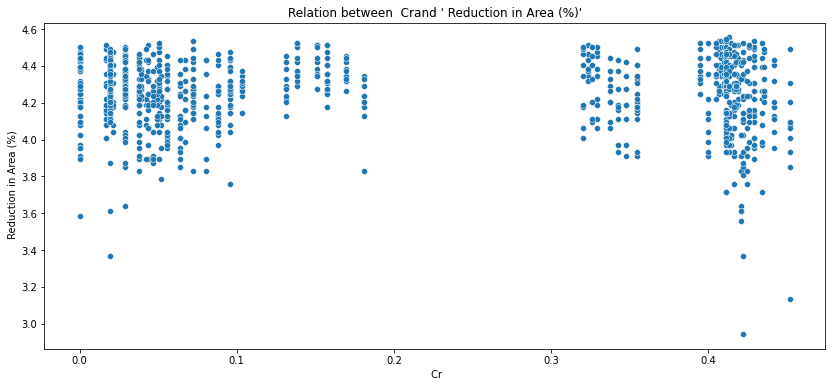

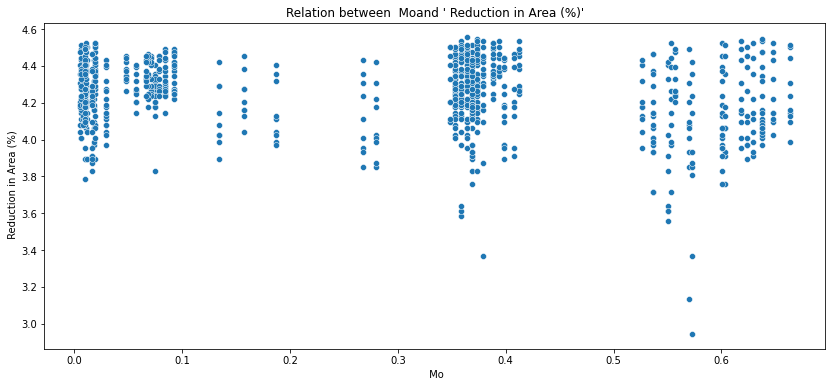

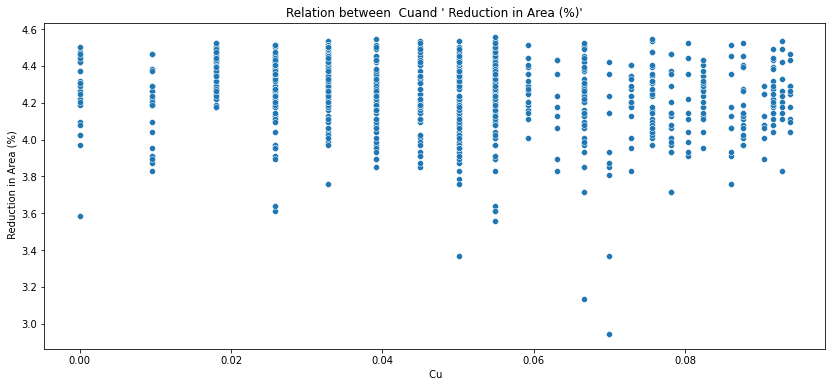

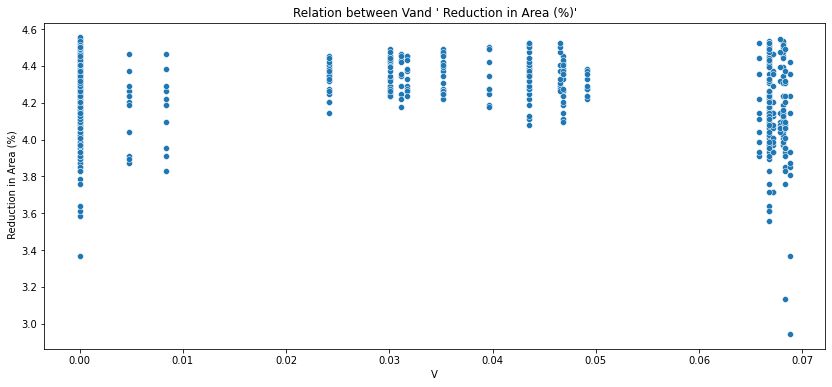

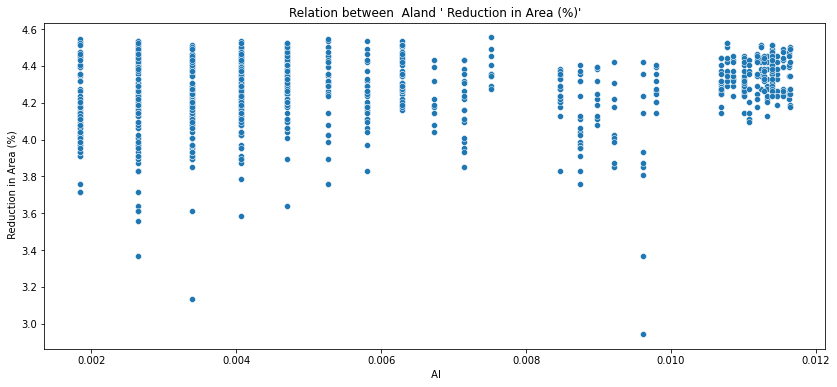

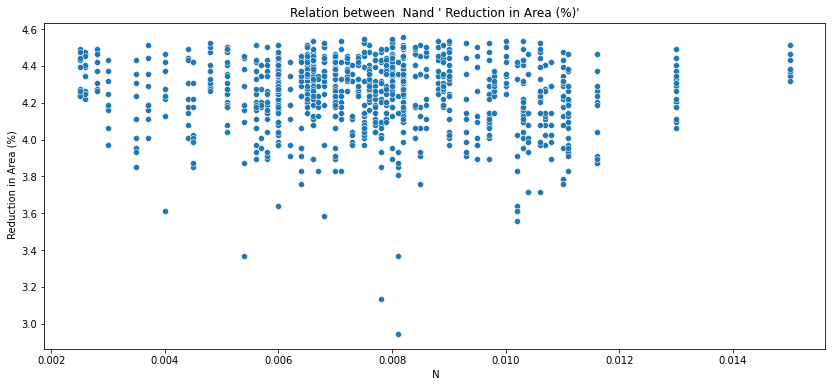

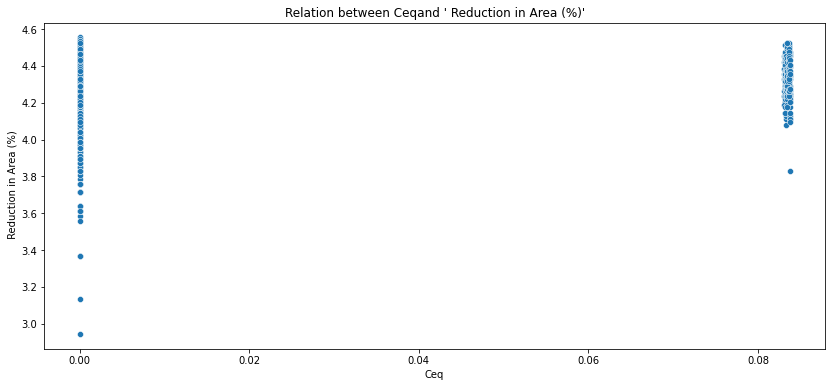

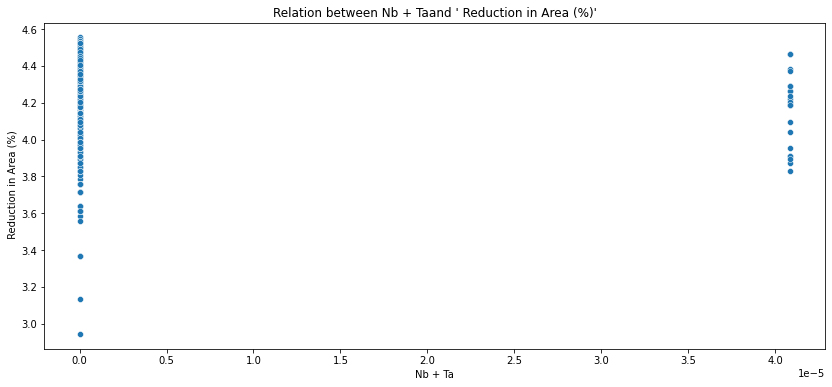

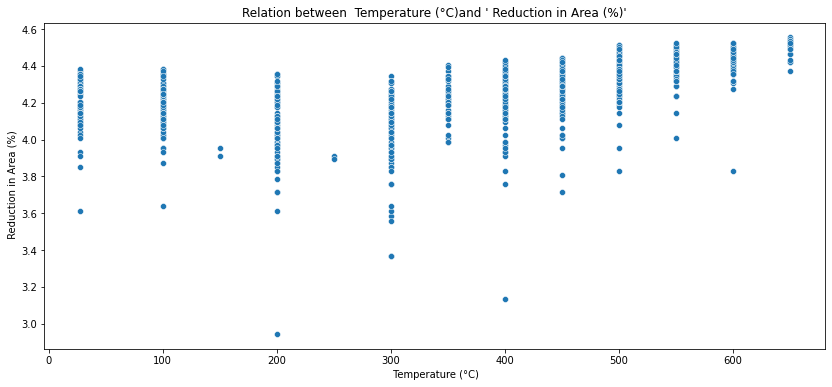

In [51]:
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.scatterplot(x=X[col],y=y[' Reduction in Area (%)'])
    plt.title(f"Relation between {col}and ' Reduction in Area (%)'")

<h3>Inference:As Temperature increases  <b>Reduction in Area (%)</b> also increases.</h3>

### <span style="color:red"><b>Categorical feature impact on `' Reduction in Area (%)'`</b></span>
<hr> 

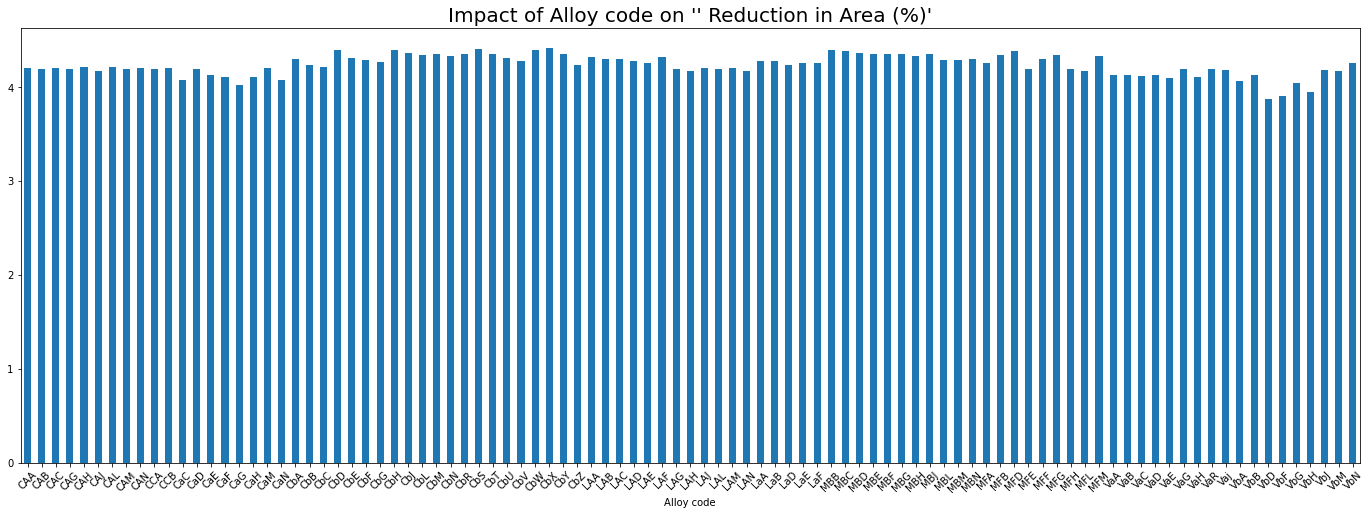

In [52]:
combined_df.groupby('Alloy code')[' Reduction in Area (%)'].median().plot(kind='bar',figsize=(24,8));
plt.title("Impact of Alloy code on '' Reduction in Area (%)'",fontsize=20)
plt.xticks(rotation=45);

<h3>Inference:No trend.</h3>

### <span style="color:red"><b>Encoding Categorical Features</b></span>
<hr>


In [53]:
X['Alloy code']=X['Alloy code'].astype('category').cat.codes

In [54]:
X.head()

Alloy code         C        Si        Mn         P         S        Ni  \
0          57  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
1          57  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
2          57  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
3          57  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   
4          57  0.070814  0.159299  0.278167  0.007247  0.002722  0.066799   

        Cr        Mo        Cu    V        Al       N  Ceq  Nb + Ta  \
0  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
1  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
2  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
3  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   
4  0.40646  0.412398  0.032847  0.0  0.002646  0.0066  0.0      0.0   

    Temperature (°C)  
0                 27  
1                100  
2                200  
3                300  
4                400

In [55]:
target_cols

[' 0.2% Proof Stress (MPa)',
 ' Tensile Strength (MPa)',
 ' Elongation (%)',
 ' Reduction in Area (%)']

### <span style="color:red"><b>Splitting the data into train and test</b></span>
<hr>



In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [57]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((732, 16), (732, 4), (183, 16), (183, 4))

# <span style="color:orange"><b>Modelling</b></span>
<hr>


## <span style="color:red"><b>model_0</b></span>
* LGBMRegressor with default parameters.
<hr>





### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>


In [59]:
# define the Kfold splits
cv=KFold(n_splits=4,shuffle=True)  

model_0=MultiOutputRegressor(LGBMRegressor(n_jobs=-1),n_jobs=-1)

model_0_val_result=cross_val_score(model_0,xtrain.values,ytrain.values,scoring='neg_root_mean_squared_error',cv=cv,n_jobs=-1).mean()

In [60]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{-model_0_val_result:.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>


In [61]:
model_0.fit(xtrain.values,ytrain.values)
model_0_test_pred=model_0.predict(xtest)
model_0_test_pred[0]

array([5.52185229, 6.13369414, 3.30180747, 4.40028447])

In [62]:
# convert to original from by applying inverse log transform
model_0_test_pred=np.expm1(model_0_test_pred)
model_0_test_pred[0]

array([249.0978627 , 460.13652217,  26.16168864,  80.47404239])

In [63]:
# true_labels
true_label=np.expm1(ytest.values)
true_label[0]

array([360., 450.,  31.,  83.])

In [64]:
model_0_test_result=mean_squared_error(true_label,model_0_test_pred,multioutput='raw_values',squared=False)
print(f"The root mean square error on test set :{model_0_test_result}")

The root mean square error on test set :[28.67914462 22.9955483   3.74029137  4.33093285]


In [68]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :<br><pre>{model_0_test_result}"+"</h3>"
display(HTML(text))


### <span style="color:red"><b>Saving the model</b></span>
<hr>

In [70]:
joblib.dump(model_0,'Multioutput_model_0.pkl')

['Multioutput_model_0.pkl']

## <span style="color:red"><b>model_1</b></span>
* LGBMRegressor with Hyperparameter tunning using Optuna
<hr>


### <span style="color:red"><b>Hyperparameter tunning using Optuna</b></span>
<hr>

In [71]:
def scoring(m,X,y):
    pred=m.predict(X)
    return mean_squared_error(y,pred,squared=False)


def objective(trial):
    
    params = {

    'n_estimators':trial.suggest_int('n_estimators',100,2000,100),
    'num_leaves':trial.suggest_int('num_leaves',10,50,1),
    'subsample':trial.suggest_discrete_uniform("subsample",0.5,1.0,0.1),
    'min_child_samples':trial.suggest_int("min_child_samples",3,40,1),
    'colsample_bytree':trial.suggest_discrete_uniform("colsample_bytree",0.5,1.0,0.1),
    'learning_rate':trial.suggest_loguniform("learning_rate",1e-2,1e+0), 
    'reg_alpha':trial.suggest_discrete_uniform('reg_alpha',1,1.5,0.1),
    'reg_lambda':trial.suggest_float('reg_lambda',1,1.5),
        
            }

    model=MultiOutputRegressor(LGBMRegressor(**params,n_jobs=-1),n_jobs=-1)
    error=cross_val_score(model,xtrain.values,ytrain.values,scoring=scoring,cv=cv,n_jobs=-1).mean()
 
    return error

In [72]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [73]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300,show_progress_bar=True,n_jobs=1)

print("Number of finished trials: {}".format(len(study.trials)))

/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/300 [00:00<?, ?it/s]

Number of finished trials: 300
CPU times: user 20.1 s, sys: 752 ms, total: 20.8 s
Wall time: 9min 50s


In [77]:
trial = study.best_trial
best_params=trial.params

In [80]:
text="<h3 style='color:blue'>"+f"Best Params :<br><br><pre>{best_params:}"+"</h3>"
display(HTML(text))


### <span style="color:red"><b>Compute Cross-validated Score using best params</b></span>
<hr>

In [81]:
# define the Kfold splits
cv=KFold(n_splits=4,shuffle=True)  

model_1=MultiOutputRegressor(LGBMRegressor(**best_params),n_jobs=-1)
model_1_val_result=cross_val_score(model_1,xtrain,ytrain.values,scoring='neg_root_mean_squared_error',cv=cv,n_jobs=-1).mean()


In [83]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{-model_0_val_result:.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [87]:
model_1=MultiOutputRegressor(LGBMRegressor(**best_params),n_jobs=-1)
model_1.fit(xtrain.values,ytrain.values)
model_1_test_pred=model_1.predict(xtest)
model_1_test_pred[:2]

array([[5.45363551, 6.09371077, 3.36777894, 4.41137226],
       [5.6259867 , 6.25681203, 3.17502892, 3.97852435]])

In [88]:
# convert to original from by applying inverse log transform
model_1_test_pred=np.expm1(model_1_test_pred)
model_1_test_pred[:1]

array([[232.60590094, 442.06246872,  28.01401348,  81.38243641]])

In [89]:
# true_labels
true_label=np.expm1(ytest.values)
true_label[:1]

array([[360., 450.,  31.,  83.]])

In [215]:
model_1_test_result=np.sqrt(mean_squared_error(true_label,model_1_test_pred,multioutput='raw_values'))

In [92]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :<pre>{model_1_test_result}"+"</h3>"
display(HTML(text))

<h3>Inference:It is not possible to tune multioutput regression model as the set of hyperparameter values suitable for one of the target variable may/may not be optimizing the other target variables.<br><br>
    <span style='color:blue'>model_0 with default parameters performed better than the model_1</span></h3>

# <span style="color:orange"><b>Model to predict `' 0.2% Proof Stress (MPa)'`</b></span>
<hr>

### <span style="color:red"><b>Train and test Split</b></span>
<hr>

In [93]:
#  stratifying the target variable 
stratified_target=pd.qcut(y.values[:,0],10,labels=False,duplicates='drop')

In [94]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y.values[:,0],stratify=stratified_target,test_size=0.2)

## <span style="color:red"><b>model_0</b></span>
* LightGBM Regressor with default parameters .
<hr>




### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [95]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4)  

stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
# to store scores
results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_0=LGBMRegressor(n_jobs=-1)
    model_0.fit(
        x_train,y_train,
        eval_set=[(x_val,y_val)],
        eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_0.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)



The root mean square error on validation set :0.1267


In [96]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b> Make predictions on the test data</b></span>
<hr>

In [97]:
model_0_test_pred=model_0.predict(xtest.values)
model_0_test_pred[0:4]

array([5.22207275, 5.27899426, 5.42143298, 6.3695947 ])

In [98]:
# convert to original from by applying inverse log transform
model_0_test_pred=np.expm1(model_0_test_pred)
model_0_test_pred[:4]

array([184.3179032 , 195.17247718, 225.20303557, 582.82115565])

In [99]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([150., 175., 198., 596.])

In [103]:
model_0_test_result=mean_squared_error(true_label,model_0_test_pred,squared=False)

In [104]:
text="<h3 style='color:blue'>"+f"The root mean square error on text set : {model_0_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3>This model performed better than the previous best in predicting the Proof stress,Saving the model</h3>

### <span style="color:red"><b>Saving the model </b></span>
<hr>

In [105]:
joblib.dump(model_0,'model_to_predict_proof_stress.pkl')

['model_to_predict_proof_stress.pkl']

### <span style="color:red"><b>model_1</b></span>
* LGBMRegressor with Hyperparameter tunning using Optuna.
<hr>






### <span style="color:red"><b>Hyperparameter tunning using Optuna</b></span>
<hr>

In [106]:
def objective(trial):
    
    params = {

    'n_estimators':trial.suggest_int('n_estimators',100,200,100),
    'num_leaves':trial.suggest_int('num_leaves',10,50,1),
    'subsample':trial.suggest_discrete_uniform("subsample",0.5,1.0,0.1),
    'min_child_samples':trial.suggest_int("min_child_samples",3,40,1),
    'colsample_bytree':trial.suggest_discrete_uniform("colsample_bytree",0.5,1.0,0.1),
    'learning_rate':trial.suggest_loguniform("learning_rate",1e-2,1e+0), 
    'reg_alpha':trial.suggest_discrete_uniform('reg_alpha',1,1.5,0.1),
    'reg_lambda':trial.suggest_float('reg_lambda',1,1.5),
        
            }
    
    stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
    # to store scores
    results=[]
    for train_idx,val_idx in cv.split(xtrain,stratified_target):
        x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
        y_train,y_val=ytrain[train_idx],ytrain[val_idx]
        model_1=LGBMRegressor(**params,n_jobs=-1,random_state=11)

        model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
        )
    
        pred=model_1.predict(x_val)
        score=mean_squared_error(y_val,pred,squared=False)
        results.append(score)
        
    return np.mean(results)

In [107]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300,show_progress_bar=True,n_jobs=1)
print("Number of finished trials: {}".format(len(study.trials)))

/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/300 [00:00<?, ?it/s]

Number of finished trials: 300
CPU times: user 4min 22s, sys: 1min 22s, total: 5min 44s
Wall time: 2min 33s


In [108]:
trial = study.best_trial
best_params=trial.params

In [109]:
text="<h3 style='color:blue'>"+f"Best Params :<br><br><pre>{best_params:}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [113]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  
stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_1=LGBMRegressor(**best_params,n_jobs=-1,random_state=11)
    model_1.fit(
               x_train.values,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
               callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_1.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)



In [114]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))


### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [115]:
model_1=LGBMRegressor(**best_params,n_jobs=-1,random_state=11)
model_1.fit(xtrain.values,ytrain)


model_1_test_pred=model_1.predict(xtest)
model_1_test_pred[:4]

array([5.16211035, 5.19650457, 4.97960861, 6.36255514])

In [116]:
# convert to original from by applying inverse log transform
model_1_test_pred=np.expm1(model_1_test_pred)
model_1_test_pred[:4]

array([173.53239128, 179.63972304, 144.41745548, 578.72574552])

In [117]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([150., 175., 198., 596.])

In [119]:
model_1_test_result=mean_squared_error(true_label,model_1_test_pred,squared=False)

In [120]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_1_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model performed better than the previous best in predicting the Proof stress,Saving the model</h3>


### <span style="color:red"><b>Saving the model </b></span>
<hr>


In [121]:
joblib.dump(model_1,'model_to_predict_proof_stress.pkl')

['model_to_predict_proof_stress.pkl']


# <span style="color:orange"><b>Model to predict `' Tensile Strength (MPa)'`</b></span>
<hr>

## <span style="color:red"><b>model_0</b></span>
* LGBMRegressor with default parameters.
<hr>



### <span style="color:red"><b>Train and test Split</b></span>
<hr>

In [122]:
#  stratifying the target variable 
stratified_target=pd.qcut(y.values[:,1],10,labels=False,duplicates='drop')

In [123]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y.values[:,1],stratify=stratified_target,test_size=0.2)

### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [126]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  

stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
# to store scores
results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_0=LGBMRegressor(n_jobs=-1)
    model_0.fit(
        x_train.values,y_train,
        eval_set=[(x_val,y_val)],
        eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_0.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)

In [127]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{-model_0_val_result:.4f}"+"</h3>"
display(HTML(text))


### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [128]:
model_0.fit(xtrain,ytrain)
model_0_test_pred=model_0.predict(xtest)
model_0_test_pred[0:4]

array([6.07543034, 6.35440516, 6.39113142, 6.32393626])

In [129]:
# convert to original from by applying inverse log transform
model_0_test_pred=np.expm1(model_0_test_pred)
model_0_test_pred[:10]

array([434.03667626, 574.02019225, 595.53112708, 556.76418411,
       439.65680853, 655.08338074, 489.35770749, 356.556702  ,
       461.59302847, 479.57899376])

In [130]:
# true_labels
true_label=np.expm1(ytest)
true_label[:10]

array([476., 585., 602., 562., 445., 612., 493., 364., 454., 482.])

In [133]:
model_0_test_result=mean_squared_error(true_label,model_0_test_pred,squared=False)

In [134]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_0_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model performed better than the previous best in predicting the tensile stress,Saving the model</h3>

### <span style="color:red"><b>Saving the model </b></span>
<hr>


In [135]:
joblib.dump(model_0,'model_to_predict_tensile_stress.pkl')

['model_to_predict_tensile_stress.pkl']

## <span style="color:red"><b>model_1</b></span>
* LGBMRegressor with Hyperparameter tunning using Hyperopt.
<hr>

### <span style="color:red"><b>Hyperparameter tunning using Optuna</b></span>
<hr>

In [136]:
def objective(trial):
    
    params = {

    'n_estimators':trial.suggest_int('n_estimators',100,2000,100),
    'num_leaves':trial.suggest_int('num_leaves',10,50,1),
    'subsample':trial.suggest_discrete_uniform("subsample",0.5,1.0,0.1),
    'min_child_samples':trial.suggest_int("min_child_samples",3,40,1),
    'colsample_bytree':trial.suggest_discrete_uniform("colsample_bytree",0.5,1.0,0.1),
    'learning_rate':trial.suggest_loguniform("learning_rate",1e-2,1e+0), 
    'reg_alpha':trial.suggest_discrete_uniform('reg_alpha',1,1.5,0.1),
    'reg_lambda':trial.suggest_float('reg_lambda',1,1.5),
        
            }
    
    stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
    # to store scores
    results=[]
    for train_idx,val_idx in cv.split(xtrain,stratified_target):
        x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
        y_train,y_val=ytrain[train_idx],ytrain[val_idx]
        model_1=LGBMRegressor(**params,n_jobs=-1,random_state=11)

        model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
        )
    
        pred=model_1.predict(x_val)
        score=mean_squared_error(y_val,pred,squared=False)
        results.append(score)
        
    return np.mean(results)

In [137]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300,show_progress_bar=True,n_jobs=1)
print("Number of finished trials: {}".format(len(study.trials)))

/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/300 [00:00<?, ?it/s]

Number of finished trials: 300
CPU times: user 5min 2s, sys: 1min 41s, total: 6min 44s
Wall time: 3min 1s


In [138]:
trial = study.best_trial
best_params=trial.params

In [139]:
text="<h3 style='color:blue'>"+f"Best Params :<br><br><pre>{best_params:}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Compute Cross-validated Score using best params</b></span>
<hr>

In [141]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  
stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')

results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_1=LGBMRegressor(**best_params,n_jobs=-1)
    model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
               callbacks=[lightgbm.early_stopping(20,verbose=0)]
    )
    
    pred=model_1.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)

In [142]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [147]:
model_1=LGBMRegressor(**best_params,n_jobs=-1)
model_1.fit(xtrain,ytrain)


model_1_test_pred=model_1.predict(xtest)
model_1_test_pred[:4]

array([6.05541048, 6.37859761, 6.39809354, 6.34793394])

In [148]:
# convert to original from by applying inverse log transform
model_1_test_pred=np.expm1(model_1_test_pred)
model_1_test_pred[:4]

array([425.41390364, 588.10098009, 599.69873766, 570.31112334])

In [149]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([476., 585., 602., 562.])

In [150]:
model_1_test_result=np.sqrt(mean_squared_error(true_label,model_1_test_pred))

The root mean square error on test set :23.9692


In [152]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_1_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model was not able to outperform the previous best model.</h3>


# <span style="color:orange"><b>Model to predict `' Elongation (%)'`</b></span>
<hr>

## <span style="color:red"><b>model_0</b></span>
* LGBMRegressor with default parameters.
<hr>

### <span style="color:red"><b>Train and test Split</b></span>
<hr>

In [153]:
#  stratifying the target variable 
stratified_target=pd.qcut(y.values[:,2],10,labels=False,duplicates='drop')

In [154]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y.values[:,2],stratify=stratified_target,test_size=0.2)

### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [155]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  

stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
# to store scores
results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_0=LGBMRegressor(n_jobs=-1)
    model_0.fit(
        x_train,y_train,
        eval_set=[(x_val,y_val)],
        eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_0.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)

In [156]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [157]:
model_0.fit(xtrain,ytrain)
model_0_test_pred=model_0.predict(xtest)
model_0_test_pred[0:4]

array([3.48974539, 3.62167025, 3.4142756 , 3.31997705])

In [158]:
# convert to original from by applying inverse log transform
model_0_test_pred=np.expm1(model_0_test_pred)
model_0_test_pred[:4]

array([31.77760108, 36.399983  , 29.39492346, 26.65971577])

In [159]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([34., 32., 31., 24.])

In [161]:
model_0_test_result=mean_squared_error(true_label,model_0_test_pred,squared=False)

In [162]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_0_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model performed better than the previous best in predicting the % Elongation,Saving the model</h3>

### <span style="color:red"><b>Saving the model </b></span>
<hr>


In [163]:
joblib.dump(model_0,'model_to_predict_%elongation_stress.pkl')

['model_to_predict_%elongation_stress.pkl']

## <span style="color:red"><b>model_1</b></span>
* LGBMRegressor with Hyperparameter tunning using Hyperopt.
<hr>

### <span style="color:red"><b>Hyperparameter tunning using Optuna</b></span>
<hr>

In [164]:
def objective(trial):
    
    params = {

    'n_estimators':trial.suggest_int('n_estimators',100,2000,100),
    'num_leaves':trial.suggest_int('num_leaves',10,50,1),
    'subsample':trial.suggest_discrete_uniform("subsample",0.5,1.0,0.1),
    'min_child_samples':trial.suggest_int("min_child_samples",3,40,1),
    'colsample_bytree':trial.suggest_discrete_uniform("colsample_bytree",0.5,1.0,0.1),
    'learning_rate':trial.suggest_loguniform("learning_rate",1e-2,1e+0), 
    'reg_alpha':trial.suggest_discrete_uniform('reg_alpha',1,1.5,0.1),
    'reg_lambda':trial.suggest_float('reg_lambda',1,1.5),
        
            }
    
    stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
    # to store scores
    results=[]
    for train_idx,val_idx in cv.split(xtrain,stratified_target):
        x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
        y_train,y_val=ytrain[train_idx],ytrain[val_idx]
        model_1=LGBMRegressor(**params,n_jobs=-1,random_state=11)

        model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
        )
    
        pred=model_1.predict(x_val)
        score=mean_squared_error(y_val,pred,squared=False)
        results.append(score)
        
    return np.mean(results)

In [165]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300,show_progress_bar=True,n_jobs=1)
print("Number of finished trials: {}".format(len(study.trials)))

/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/300 [00:00<?, ?it/s]

Number of finished trials: 300
CPU times: user 12min 13s, sys: 4min 14s, total: 16min 27s
Wall time: 6min 54s


In [166]:
trial = study.best_trial
best_params=trial.params

In [167]:
text="<h3 style='color:blue'>"+f"Best Params :<br><br><pre>{best_params:}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [175]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  
stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')

results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_1=LGBMRegressor(**best_params,n_jobs=-1)
    model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
               callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_1.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)

In [176]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))


### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [178]:
model_1=LGBMRegressor(**best_params,n_jobs=-1)
model_1.fit(xtrain,ytrain )


model_1_test_pred=model_1.predict(xtest)
model_1_test_pred[:4]

array([3.51616851, 3.59441249, 3.37855523, 3.35783954])

In [179]:
# convert to original from by applying inverse log transform
model_1_test_pred=np.expm1(model_1_test_pred)
model_1_test_pred[:4]

array([32.6552315 , 35.39431176, 28.32836789, 27.72706022])

In [180]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([34., 32., 31., 24.])

In [182]:
model_1_test_result=np.sqrt(mean_squared_error(true_label,model_1_test_pred))

In [183]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_1_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model was not able to outperform the previous best model.</h3>



# <span style="color:orange"><b>Model to predict `' Reduction in Area (%)'`</b></span>
<hr>

### <span style="color:red"><b>Train and test Split</b></span>
<hr>

In [184]:
#  stratifying the target variable 
stratified_target=pd.qcut(y.values[:,3],10,labels=False,duplicates='drop')

In [185]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y.values[:,3],stratify=stratified_target,test_size=0.2)

## <span style="color:red"><b>model_0</b></span>
* LGBMRegressor with default parameters.<hr>

### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [189]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  

stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
# to store scores
results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_0=LGBMRegressor(n_jobs=-1)
    model_0.fit(
        x_train,y_train,
        eval_set=[(x_val,y_val)],
        eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_0.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)

In [190]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [191]:
model_0.fit(xtrain,ytrain)
model_0_test_pred=model_0.predict(xtest)
model_0_test_pred[0:4]

array([4.27345495, 4.32448556, 4.2080178 , 4.47045372])

In [192]:
# convert to original from by applying inverse log transform
model_0_test_pred=np.expm1(model_0_test_pred)
model_0_test_pred[:4]

array([70.76916643, 74.52664889, 66.22315822, 86.39636758])

In [193]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([71., 74., 69., 85.])

In [196]:
model_0_test_result=mean_squared_error(true_label,model_0_test_pred,squared=False)

In [197]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_0_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model performed better than the previous best in predicting the %Reduction in Area,Saving the model</h3>

### <span style="color:red"><b>Saving the model </b></span>
<hr>

In [198]:
joblib.dump(model_1,'model_to_predict_%_redn_in_area.pkl')

['model_to_predict_%_redn_in_area.pkl']

## <span style="color:red"><b>model_1</b></span>
* LGBMRegressor with Hyperparameter tunning using Hyperopt.
<hr>

### <span style="color:red"><b>Hyperparameter tunning using Optuna</b></span>
<hr>

In [216]:
def objective(trial):
    
    params = {

    'n_estimators':trial.suggest_int('n_estimators',100,2000,100),
    'num_leaves':trial.suggest_int('num_leaves',10,50,1),
    'subsample':trial.suggest_discrete_uniform("subsample",0.5,1.0,0.1),
    'min_child_samples':trial.suggest_int("min_child_samples",3,40,1),
    'colsample_bytree':trial.suggest_discrete_uniform("colsample_bytree",0.5,1.0,0.1),
    'learning_rate':trial.suggest_loguniform("learning_rate",1e-2,1e+0), 
    'reg_alpha':trial.suggest_discrete_uniform('reg_alpha',1,1.5,0.1),
    'reg_lambda':trial.suggest_float('reg_lambda',1,1.5),
        
            }
    
    stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')
    # to store scores
    results=[]
    for train_idx,val_idx in cv.split(xtrain,stratified_target):
        x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
        y_train,y_val=ytrain[train_idx],ytrain[val_idx]
        model_1=LGBMRegressor(**params,n_jobs=-1,random_state=11)

        model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
        callbacks=[lightgbm.early_stopping(10,verbose=0)]
        )
    
        pred=model_1.predict(x_val)
        score=mean_squared_error(y_val,pred,squared=False)
        results.append(score)
        
    return np.mean(results)

In [217]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=300,show_progress_bar=True,n_jobs=1)
print("Number of finished trials: {}".format(len(study.trials)))

/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/300 [00:00<?, ?it/s]

Number of finished trials: 300
CPU times: user 15min 28s, sys: 5min 17s, total: 20min 45s
Wall time: 8min 23s


In [218]:
trial = study.best_trial
best_params=trial.params

In [219]:
text="<h3 style='color:blue'>"+f"Best Params :<br><br><pre>{best_params:}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Compute Cross-validated Score</b></span>
<hr>

In [220]:
# define the Kfold splits
cv=StratifiedKFold(n_splits=4,shuffle=True)  
stratified_target=pd.qcut(ytrain,10,labels=False,duplicates='drop')

results=[]
for train_idx,val_idx in cv.split(xtrain,stratified_target):
    x_train,x_val=xtrain.iloc[train_idx],xtrain.iloc[val_idx]
    y_train,y_val=ytrain[train_idx],ytrain[val_idx]
    model_1=LGBMRegressor(**best_params,n_jobs=-1)
    model_1.fit(
               x_train,y_train,
               eval_set=[(x_val,y_val)],
               eval_metric='l2_root',
               callbacks=[lightgbm.early_stopping(10,verbose=0)]
    )
    
    pred=model_1.predict(x_val)
    score=mean_squared_error(y_val,pred,squared=False)
    results.append(score)

In [221]:
text="<h3 style='color:blue'>"+f"The root mean square error on validation set :{np.mean(results):.4f}"+"</h3>"
display(HTML(text))

### <span style="color:red"><b>Train the model to make predictions</b></span>
<hr>

In [222]:
model_1=LGBMRegressor(**best_params,n_jobs=-1)
model_1.fit(xtrain,ytrain)


model_1_test_pred=model_1.predict(xtest)
model_1_test_pred[:4]

array([4.25761806, 4.29325754, 4.22718707, 4.47829392])

In [223]:
# convert to original from by applying inverse log transform
model_1_test_pred=np.expm1(model_1_test_pred)
model_1_test_pred[:4]

array([69.6415193 , 72.20454707, 67.5242072 , 87.08426597])

In [224]:
# true_labels
true_label=np.expm1(ytest)
true_label[:4]

array([71., 74., 69., 85.])

In [225]:
model_1_test_result=np.sqrt(mean_squared_error(true_label,model_1_test_pred))

In [226]:
text="<h3 style='color:blue'>"+f"The root mean square error on test set :{model_1_test_result:.4f}"+"</h3>"
display(HTML(text))

<h3 style='color:purple'>This model was not able to outperform the previous best model.</h3>

<center><h3 style='color:green'><b>Thank You!!!!!</b></h3><hr></center>